# Importing Libaries

###  This data set for classification algorithm practice on inequality of income

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,accuracy_score,classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import squarify
import warnings
warnings.filterwarnings('ignore')
pd.pandas.set_option('display.max_columns',None)

###  Fetching data

In [3]:
df=pd.read_csv('Inequality_Prediction_Dataset.csv')

In [5]:
df.head()

ID  age   gender               education                class  \
0  ID_TZ0000   79   Female    High school graduate                  NaN   
1  ID_TZ0001   65   Female    High school graduate                  NaN   
2  ID_TZ0002   21     Male   12th grade no diploma   Federal government   
3  ID_TZ0003    2   Female                Children                  NaN   
4  ID_TZ0004   70     Male    High school graduate                  NaN   

  education_institute                    marital_status  \
0                 NaN                           Widowed   
1                 NaN                           Widowed   
2                 NaN                     Never married   
3                 NaN                     Never married   
4                 NaN   Married-civilian spouse present   

                         race is_hispanic      employment_commitment  \
0                       White   All other         Not in labor force   
1                       White   All other   Children or Armed Forces   
2                       Black   All other   Children or Armed Forces   
3   Asian or Pacific Islander   All other   Children or Armed Forces   
4                       White   All other         Not in labor force   

  unemployment_reason  employment_stat  wage_per_hour is_labor_union  \
0                 NaN                0              0            NaN   
1                 NaN                0              0            NaN   
2                 NaN                0            500             No   
3                 NaN                0              0            NaN   
4                 NaN                0              0            NaN   

   working_week_per_year  industry_code            industry_code_main  \
0                     52              0   Not in universe or children   
1                      0              0   Not in universe or children   
2                     15             41             Hospital services   
3                      0              0   Not in universe or children   
4                      0              0   Not in universe or children   

   occupation_code             occupation_code_main  total_employed  \
0                0                              NaN               2   
1                0                              NaN               0   
2               26   Adm support including clerical               4   
3                0                              NaN               0   
4                0                              NaN               0   

                             household_stat              household_summary  \
0                               Householder                    Householder   
1                     Nonfamily householder                    Householder   
2   Child 18+ never marr Not in a subfamily              Child 18 or older   
3     Child <18 never marr not in subfamily   Child under 18 never married   
4                     Spouse of householder          Spouse of householder   

         under_18_family veterans_admin_questionnaire  vet_benefit  \
0                    NaN                          NaN            2   
1                    NaN                          NaN            2   
2                    NaN                          NaN            2   
3   Both parents present                          NaN            0   
4                    NaN                          NaN            2   

           tax_status  gains  losses  stocks_status citizenship  mig_year  \
0   Head of household      0       0            292      Native        95   
1              Single      0       0              0      Native        94   
2              Single      0       0              0      Native        94   
3            Nonfiler      0       0              0      Native        94   
4      Joint both 65+      0       0              0      Native        95   

  country_of_birth_own country_of_birth_father country_of_birth_mother  \
0                   US                      U

In [6]:
# Shape of dataset
print('Rows: {} Columns: {}'.format(df.shape[0], df.shape[1]))

Rows: 209499 Columns: 43


In [9]:
# Features data-type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209499 entries, 0 to 209498
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              209499 non-null  object 
 1   age                             209499 non-null  int64  
 2   gender                          209499 non-null  object 
 3   education                       209499 non-null  object 
 4   class                           104254 non-null  object 
 5   education_institute             13302 non-null   object 
 6   marital_status                  209499 non-null  object 
 7   race                            209499 non-null  object 
 8   is_hispanic                     209499 non-null  object 
 9   employment_commitment           209499 non-null  object 
 10  unemployment_reason             6520 non-null    object 
 11  employment_stat                 209499 non-null  int64  
 12  wage_per_hour   

In [10]:
# Statistical summary
df.describe()

age  employment_stat  wage_per_hour  working_week_per_year  \
count  209499.000000    209499.000000  209499.000000          209499.000000   
mean       34.518728         0.176760      55.433487              23.158850   
std        22.306738         0.555562     276.757327              24.397963   
min         0.000000         0.000000       0.000000               0.000000   
25%        15.000000         0.000000       0.000000               0.000000   
50%        33.000000         0.000000       0.000000               8.000000   
75%        50.000000         0.000000       0.000000              52.000000   
max        90.000000         2.000000    9999.000000              52.000000   

       industry_code  occupation_code  total_employed    vet_benefit  \
count  209499.000000    209499.000000   209499.000000  209499.000000   
mean       15.332398        11.321734        1.956067       1.515854   
std        18.049655        14.460839        2.365154       0.850853   
min         0.000000         0.000000        0.000000       0.000000   
25%         0.000000         0.000000        0.000000       2.000000   
50%         0.000000         0.000000        1.000000       2.000000   
75%        33.000000        26.000000        4.000000       2.000000   
max        51.000000        46.000000        6.000000       2.000000   

               gains         losses  stocks_status       mig_year  \
count  209499.000000  209499.000000  209499.000000  209499.000000   
mean      435.926887      36.881737     194.533420      94.499745   
std      4696.359500     270.383302    1956.375501       0.500001   
min         0.000000       0.000000       0.000000      94.000000   
25%         0.000000       0.000000       0.000000      94.000000   
50%         0.000000       0.000000       0.000000      94.000000   
75%         0.000000       0.000000       0.000000      95.000000   
max     99999.000000    4608.000000   99999.000000      95.000000   

       importance_of_record  
count         209499.000000  
mean            1740.888324  
std              995.559557  
min               37.870000  
25%             1061.290000  
50%             1617.040000  
75%             2185.480000  
max            18656.300000

In [ ]:
df.describe().T 

In [ ]:
### Statistics for numeric column in hozirnal 

#### Exploratory Data Analysis 

In [11]:
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_feature=[feature for feature in numerical_feature if len(df[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [feature for feature in df.columns if feature not in numerical_feature]

print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))

Numerical Features Count 13
Discrete feature Count 4
Continuous feature Count 9
Categorical feature Count 30


<div class="alert alert-danger" style="font-size:14px; font-family:verdana; line-height: 1.7em;"> 

If you check few of the last columns you will find ? in the columns. So we would convert them to nan value

In [12]:
round((df.isna().sum() / df.shape[0]) * 100, 2).astype(str) + ' %'

ID                                  0.0 %
age                                 0.0 %
gender                              0.0 %
education                           0.0 %
class                             50.24 %
education_institute               93.65 %
marital_status                      0.0 %
race                                0.0 %
is_hispanic                         0.0 %
employment_commitment               0.0 %
unemployment_reason               96.89 %
employment_stat                     0.0 %
wage_per_hour                       0.0 %
is_labor_union                    90.42 %
working_week_per_year               0.0 %
industry_code                       0.0 %
industry_code_main                  0.0 %
occupation_code                     0.0 %
occupation_code_main              50.45 %
total_employed                      0.0 %
household_stat                      0.0 %
household_summary                   0.0 %
under_18_family                   72.39 %
veterans_admin_questionnaire      

In [13]:
df.replace({' ?':np.nan},inplace=True)

In [14]:
round((df.isna().sum() / df.shape[0]) * 100, 2).astype(str) + ' %'

ID                                  0.0 %
age                                 0.0 %
gender                              0.0 %
education                           0.0 %
class                             50.24 %
education_institute               93.65 %
marital_status                      0.0 %
race                                0.0 %
is_hispanic                         0.0 %
employment_commitment               0.0 %
unemployment_reason               96.89 %
employment_stat                     0.0 %
wage_per_hour                       0.0 %
is_labor_union                    90.42 %
working_week_per_year               0.0 %
industry_code                       0.0 %
industry_code_main                  0.0 %
occupation_code                     0.0 %
occupation_code_main              50.45 %
total_employed                      0.0 %
household_stat                      0.0 %
household_summary                   0.0 %
under_18_family                   72.39 %
veterans_admin_questionnaire      

In [15]:
def plot_count(df: pd.core.frame.DataFrame, col: str, title_name: str='Train') -> None:
    # Set background color
    plt.rcParams['figure.facecolor'] = '#FFFAF0'
    
    f, ax = plt.subplots(1, 2, figsize=(12, 6))
    plt.subplots_adjust(wspace=0.1)

    s1 = df[col].value_counts()
    N = len(s1)

    outer_sizes = s1
    inner_sizes = s1/N

    outer_colors = ['#9E3F00', '#eb5e00', '#ff781f']
    inner_colors = ['#ff6905', '#ff8838', '#ffa66b']

    ax[0].pie(
        outer_sizes,colors=outer_colors, 
        labels=s1.index.tolist(), 
        startangle=90, frame=True, radius=1.4, 
        explode=([0.05]*(N-1) + [.3]),
        wedgeprops={'linewidth' : 1, 'edgecolor' : 'white'}, 
        textprops={'fontsize': 12, 'weight': 'bold'}
    )

    textprops = {
        'size': 13, 
        'weight': 'bold', 
        'color': 'white'
    }

    ax[0].pie(
        inner_sizes, colors=inner_colors,
        radius=1, startangle=90,
        autopct='%1.f%%', explode=([.1]*(N-1) + [.3]),
        pctdistance=0.8, textprops=textprops
    )

    center_circle = plt.Circle((0,0), .68, color='black', fc='white', linewidth=0)
    ax[0].add_artist(center_circle)

    x = s1
    y = s1.index.tolist()
    sns.barplot(
        x=x, y=y, ax=ax[1],
        palette='YlOrBr_r', orient='horizontal'
    )

    ax[1].spines['top'].set_visible(False)
    ax[1].spines['right'].set_visible(False)
    ax[1].tick_params(
        axis='x',         
        which='both',      
        bottom=False,      
        labelbottom=False
    )

    for i, v in enumerate(s1):
        ax[1].text(v, i+0.1, str(v), color='black', fontweight='bold', fontsize=12)

    plt.setp(ax[1].get_yticklabels(), fontweight="bold")
    plt.setp(ax[1].get_xticklabels(), fontweight="bold")
    ax[1].set_xlabel(col, fontweight="bold", color='black')
    ax[1].set_ylabel('count', fontweight="bold", color='black')

    f.suptitle(f'{title_name}', fontsize=18, fontweight='bold')
    plt.tight_layout()
    plt.show()
    plt.rcParams['figure.facecolor'] = '#FFFFFF'

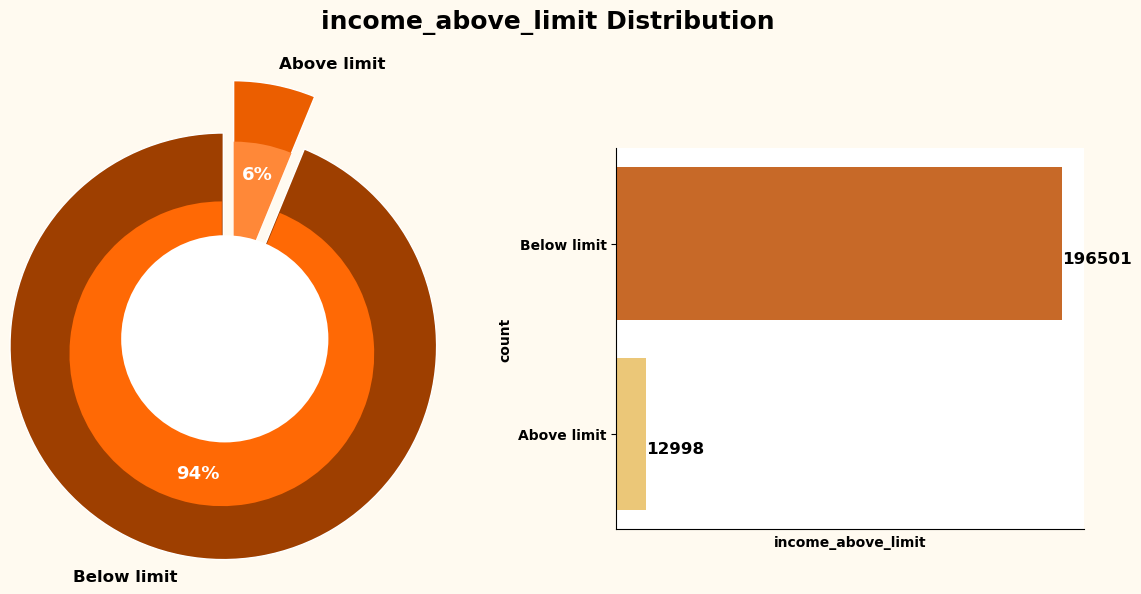

In [16]:
plot_count(df, 'income_above_limit', 'income_above_limit Distribution')

 
 ###### The dataset is unbalanced, as the dependent feature 'income_above_limit' contains 93.8% values have income less than limit and 6.2% values have income more than limitSo many null values are also present which is not great

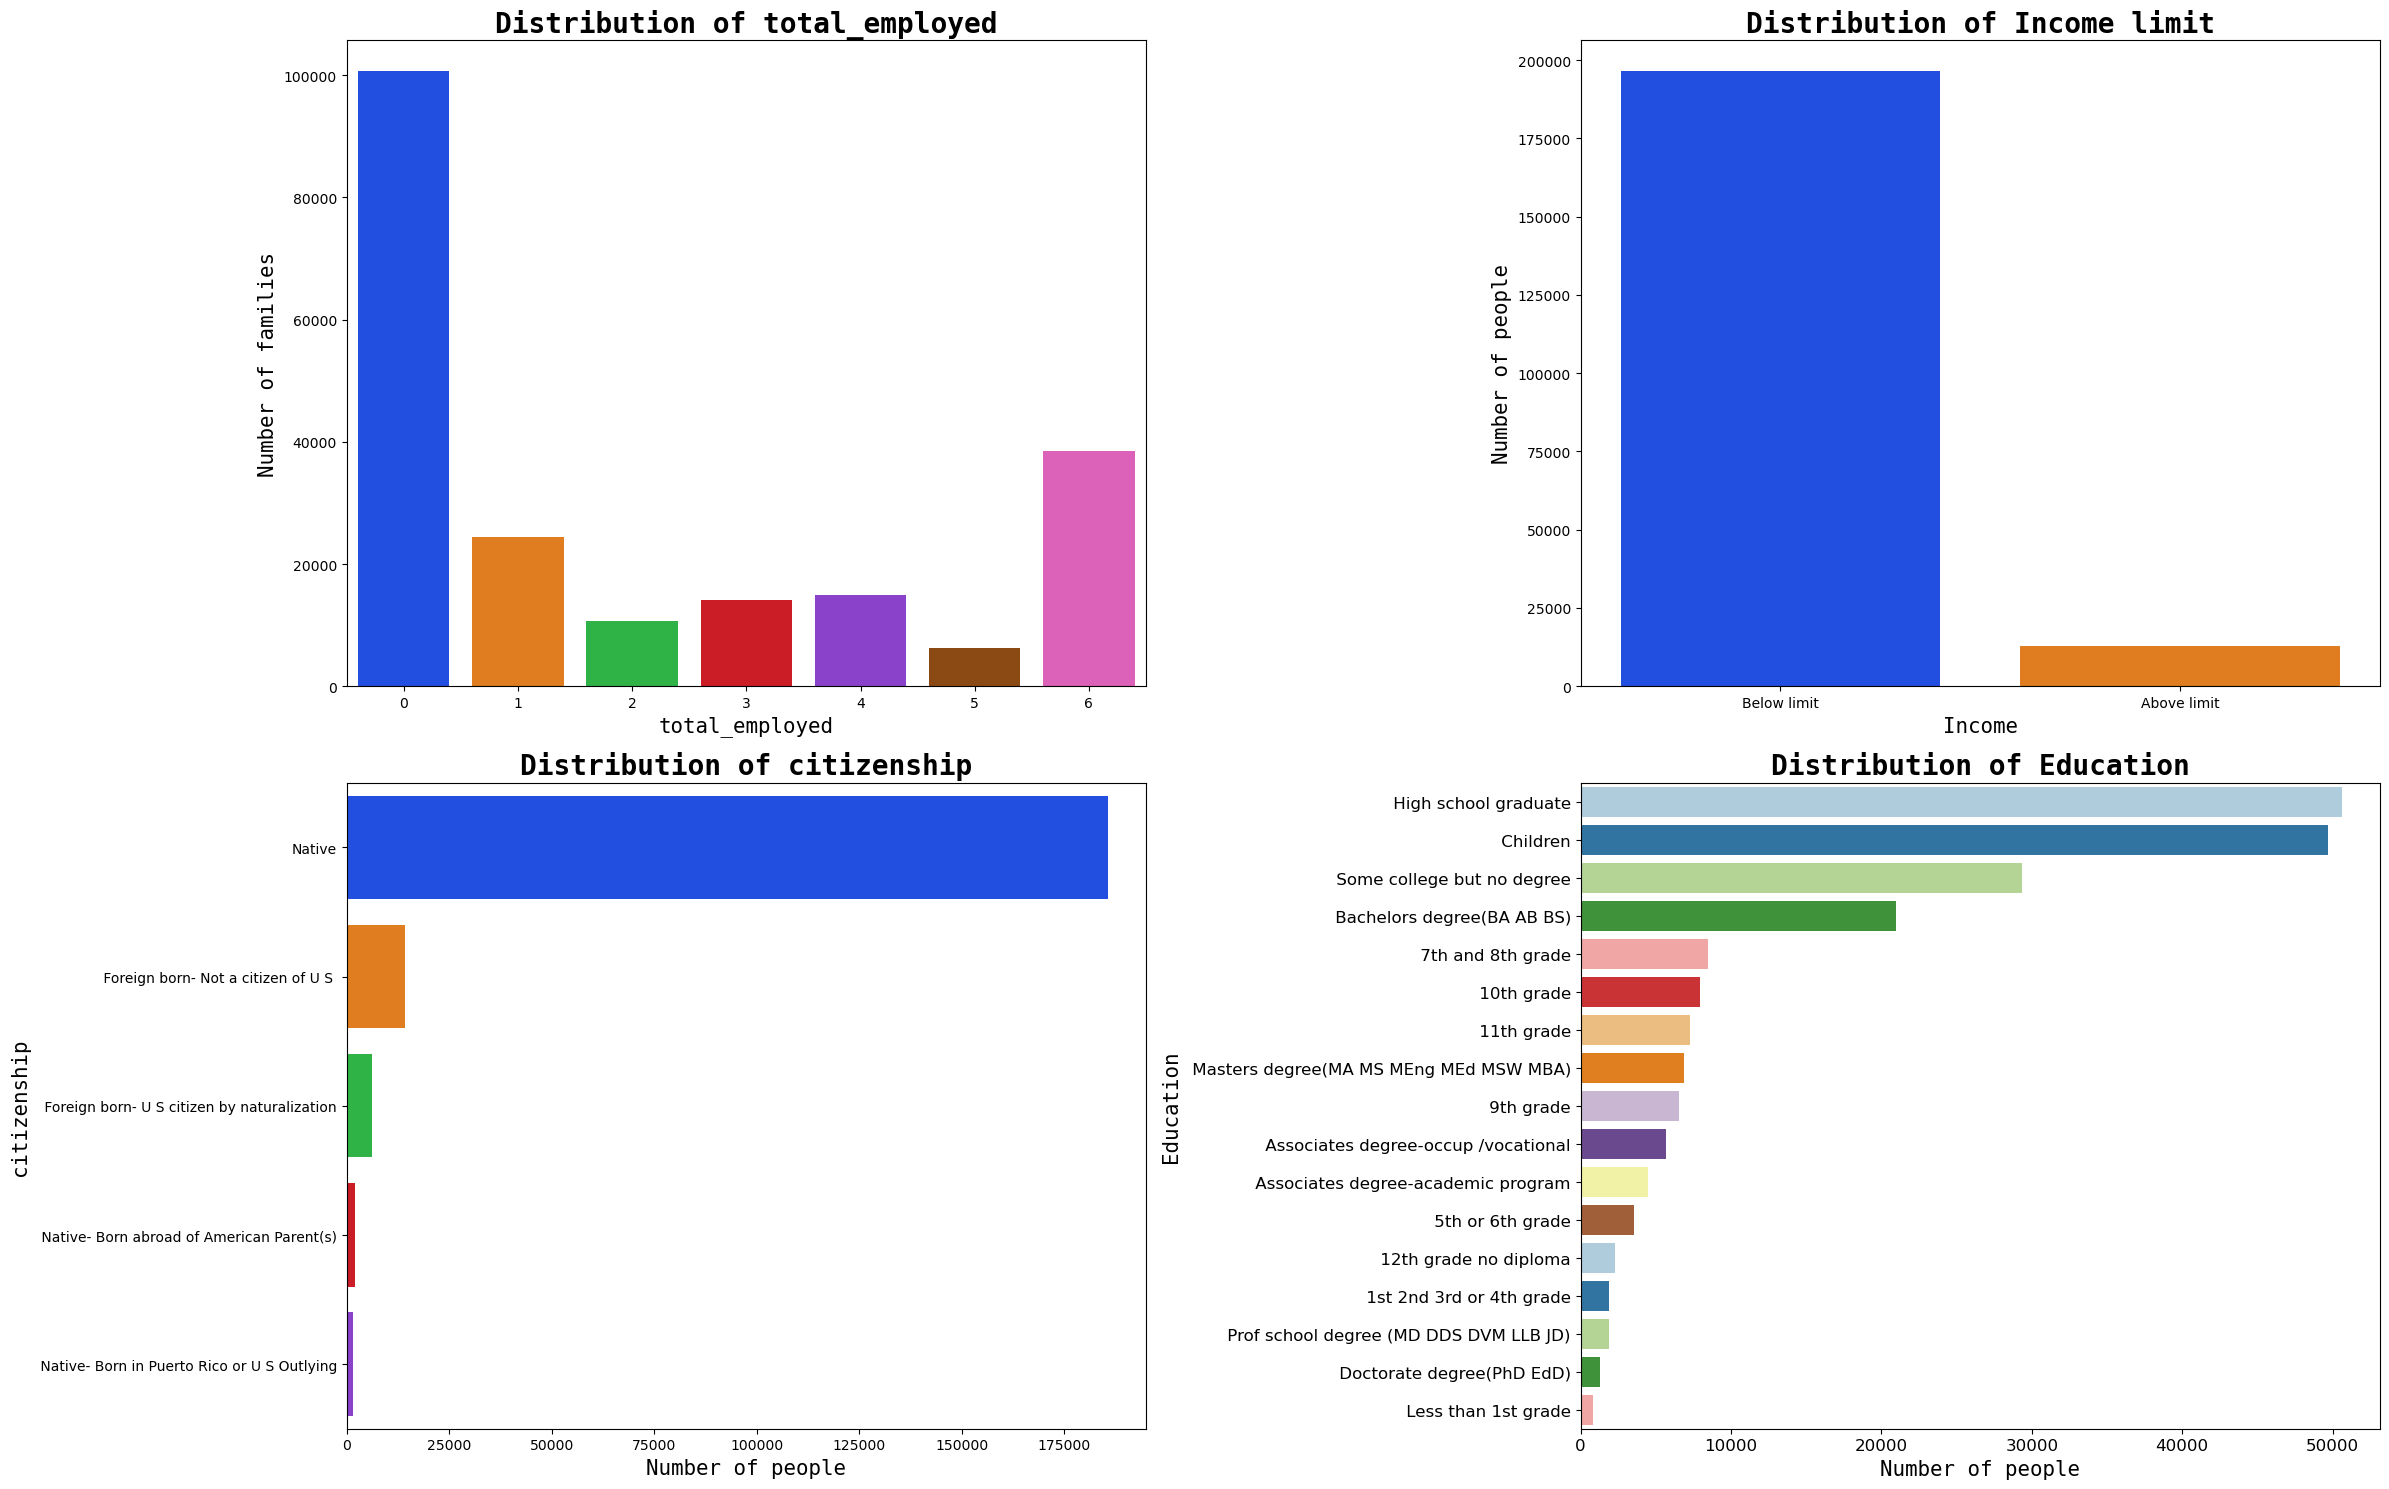

In [17]:
fig, axs = plt.subplots(2, 2, figsize=(24, 15))

# Distribution of total_employed
total_employed = df['total_employed'].value_counts()
sns.barplot(x=total_employed.index, y=total_employed.values, palette='bright', ax=axs[0,0])
axs[0,0].set_title('Distribution of total_employed', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
axs[0,0].set_xlabel('total_employed', fontdict={'fontname': 'Monospace', 'fontsize': 15})
axs[0,0].set_ylabel('Number of families', fontdict={'fontname': 'Monospace', 'fontsize': 15})
axs[0,0].tick_params(labelsize=10)

# Distribution of Income limit
income = df['income_above_limit'].value_counts()
sns.barplot(x=income.index, y=income.values, palette='bright', ax=axs[0,1])
axs[0,1].set_title('Distribution of Income limit', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
axs[0,1].set_xlabel('Income', fontdict={'fontname': 'Monospace', 'fontsize': 15})
axs[0,1].set_ylabel('Number of people', fontdict={'fontname': 'Monospace', 'fontsize': 15})
axs[0,1].tick_params(labelsize=10)

citizenship = df['citizenship'].value_counts()
sns.barplot(y=citizenship.index,x=citizenship.values,palette='bright',ax=axs[1,0])
axs[1,0].set_title('Distribution of citizenship', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
axs[1,0].set_ylabel('citizenship', fontdict={'fontname': 'Monospace', 'fontsize': 15})
axs[1,0].set_xlabel('Number of people', fontdict={'fontname': 'Monospace', 'fontsize': 15})
axs[1,0].tick_params(labelsize=10)

edu = df['education'].value_counts()
sns.barplot(x=edu.values, y=edu.index, palette='Paired',ax=axs[1,1])
axs[1,1].set_title('Distribution of Education', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
axs[1,1].set_xlabel('Number of people', fontdict={'fontname': 'Monospace', 'fontsize': 15})
axs[1,1].set_ylabel('Education', fontdict={'fontname': 'Monospace', 'fontsize': 15})
axs[1,1].tick_params(labelsize=12)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

<div style="border-radius:10px; border: #0080FF solid; padding: 15px; background-color: #CEF6F5; font-size:100%; text-align:left">
<font color='#0080FF'>Question 1: Does education have any impact on income?</font>

In [18]:
edu_df = df.copy(deep=True)

edu_df['education'].value_counts()

education
 High school graduate                      50627
 Children                                  49685
 Some college but no degree                29320
 Bachelors degree(BA AB BS)                20979
 7th and 8th grade                          8438
 10th grade                                 7905
 11th grade                                 7260
 Masters degree(MA MS MEng MEd MSW MBA)     6861
 9th grade                                  6540
 Associates degree-occup /vocational        5650
 Associates degree-academic program         4494
 5th or 6th grade                           3542
 12th grade no diploma                      2282
 1st 2nd 3rd or 4th grade                   1917
 Prof school degree (MD DDS DVM LLB JD)     1852
 Doctorate degree(PhD EdD)                  1318
 Less than 1st grade                         829
Name: count, dtype: int64

In [19]:
edu_df['education'].unique()

array([' High school graduate', ' 12th grade no diploma', ' Children',
       ' Bachelors degree(BA AB BS)', ' 7th and 8th grade', ' 11th grade',
       ' 9th grade', ' Masters degree(MA MS MEng MEd MSW MBA)',
       ' 10th grade', ' Associates degree-academic program',
       ' 1st 2nd 3rd or 4th grade', ' Some college but no degree',
       ' Less than 1st grade', ' Associates degree-occup /vocational',
       ' Prof school degree (MD DDS DVM LLB JD)', ' 5th or 6th grade',
       ' Doctorate degree(PhD EdD)'], dtype=object)

<Axes: ylabel='education'>

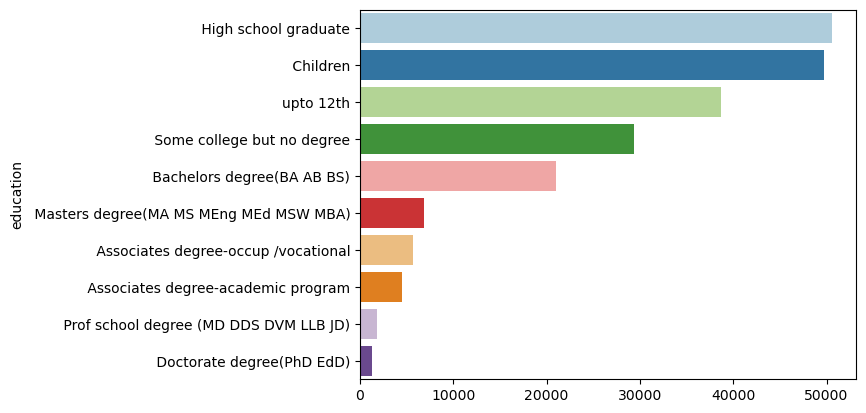

In [20]:
edu_df.replace({' 7th and 8th grade':'upto 12th',' Less than 1st grade':'upto 12th',' 1st 2nd 3rd or 4th grade':'upto 12th',
                ' 5th or 6th grade':'upto 12th',' 9th grade':'upto 12th',' 11th grade':'upto 12th',
                ' 10th grade':'upto 12th',' 12th grade no diploma':'upto 12th'},inplace=True)

edu = edu_df['education'].value_counts()
sns.barplot(x=edu.values, y=edu.index, palette='Paired')

In [21]:
print('Income below limit for people upto 12th:',len(edu_df.loc[(edu_df['education']=='upto 12th') & (edu_df['income_above_limit']=='Below limit')])/len(edu_df.loc[(edu_df['education']=='upto 12th')]) * 100, '%')
print('Income above limit for people upto 12th:',len(edu_df.loc[(edu_df['education']=='upto 12th') & (edu_df['income_above_limit']=='Above limit')])/len(edu_df.loc[(edu_df['education']=='upto 12th')]) * 100, '%')

Income below limit for people upto 12th: 99.111409604009 %
Income above limit for people upto 12th: 0.8885903959910109 %


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>💡 Observations:</font></h3>
   
* People with education upto only 12th are under the income limit with a few exceptions
* There are so many childrens in the data 
* Also after converting all the grades upto 12th we find that also forms a major proportion if combined

<div style="border-radius:10px; border: #0080FF solid; padding: 15px; background-color: #CEF6F5; font-size:100%; text-align:left">
<font color='#0080FF'>Question 2: Does citizenship have any impact on income?</font>

In [22]:
print('Native citizenship having income below limit:',len(df.loc[(df['citizenship']=='Native') & (df['income_above_limit']=='Below limit')])/len(df.loc[(edu_df['citizenship']=='Native')]) * 100, '%')
print('Non-Native citizenship having income below limit:',len(df.loc[(df['citizenship']!='Native') & (df['income_above_limit']=='Below limit')])/len(df.loc[(edu_df['citizenship']!='Native')]) * 100, '%')

Native citizenship having income below limit: 93.69307746581282 %
Non-Native citizenship having income below limit: 94.5950482584977 %


<div class="alert alert-success" style="font-size:14px; font-family:verdana; line-height: 1.7em;"> 

It seems there is no discrimination as almost both natives and non natives have very similar below income rate

<div style="border-radius:10px; border: #0080FF solid; padding: 15px; background-color: #CEF6F5; font-size:100%; text-align:left">
<font color='#0080FF'>Question 3: Does number of employed persons matter?</font>

In [23]:
print('Employed more than 1 but income is below limit:',len(df.loc[(df['total_employed']>1) & (df['income_above_limit']=='Below limit')])/len(df.loc[(edu_df['total_employed']>1)]) * 100, '%')
print('Employed only 1 but income is below limit:',len(df.loc[(df['total_employed']==1) & (df['income_above_limit']=='Below limit')])/len(df.loc[(edu_df['total_employed']==1)]) * 100, '%')
print('None employed and income is below limit:',len(df.loc[(df['total_employed']==0) & (df['income_above_limit']=='Below limit')])/len(df.loc[(edu_df['total_employed']==0)]) * 100, '%')

Employed more than 1 but income is below limit: 87.92360338172259 %
Employed only 1 but income is below limit: 91.140123988997 %
None employed and income is below limit: 99.36337994597172 %


In [24]:
print('People above income limit with more than 1 employed:',len(df.loc[(df['total_employed']>1) & (df['income_above_limit']=='Above limit')]))
print('People above income limit with only 1 employed:',len(df.loc[(df['total_employed']==1) & (df['income_above_limit']=='Above limit')]))

People above income limit with more than 1 employed: 10199
People above income limit with only 1 employed: 2158


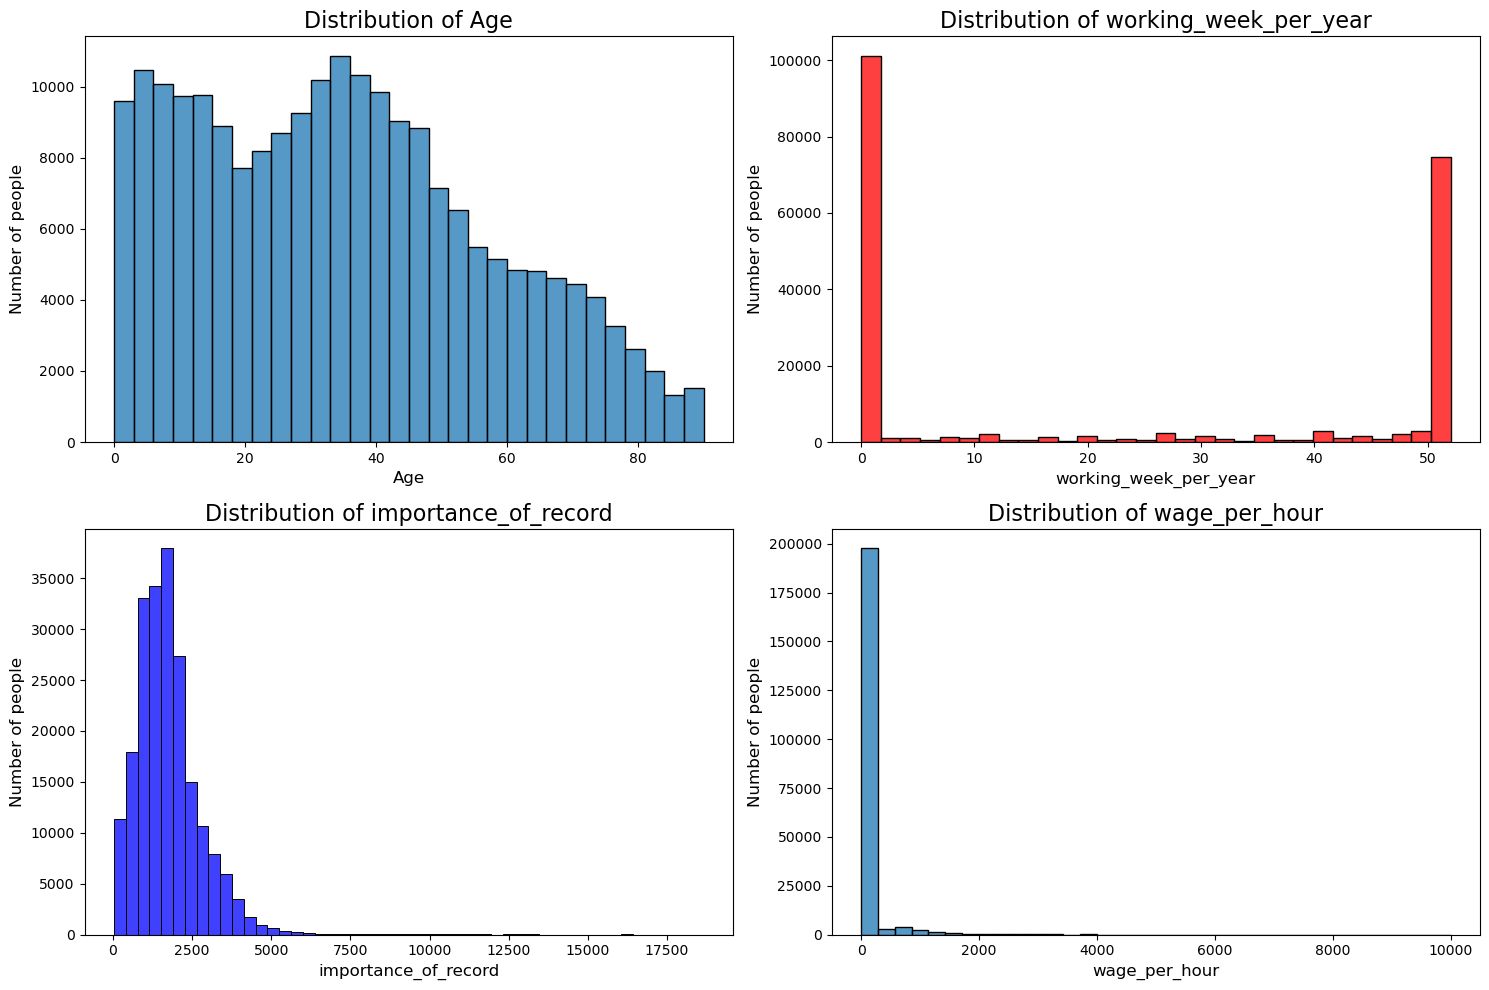

In [25]:
# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot the distribution of Age
sns.histplot(df['age'], bins=30, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Age', fontsize=16)
axes[0, 0].set_xlabel('Age', fontsize=12)
axes[0, 0].set_ylabel('Number of people', fontsize=12)

# Plot the distribution of working_week_per_year
sns.histplot(df['working_week_per_year'], bins=30, color='red', ax=axes[0, 1])
axes[0, 1].set_title('Distribution of working_week_per_year', fontsize=16)
axes[0, 1].set_xlabel('working_week_per_year', fontsize=12)
axes[0, 1].set_ylabel('Number of people', fontsize=12)

# Plot the distribution of importance_of_record
sns.histplot(df['importance_of_record'], bins=50, color='blue', ax=axes[1, 0])
axes[1, 0].set_title('Distribution of importance_of_record', fontsize=16)
axes[1, 0].set_xlabel('importance_of_record', fontsize=12)
axes[1, 0].set_ylabel('Number of people', fontsize=12)

# Plot the distribution of wage_per_hour
sns.histplot(df['wage_per_hour'], bins=35, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of wage_per_hour', fontsize=16)
axes[1, 1].set_xlabel('wage_per_hour', fontsize=12)
axes[1, 1].set_ylabel('Number of people', fontsize=12)

# Adjust layout
plt.tight_layout()

# Show the subplots
plt.show()

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>💡 Observations:</font></h3>
   
* The working week per hour again shows that as there are so many children the ditribution has a high peak at 0 working hours
* There are so many people with low pages i.e. less than 2000

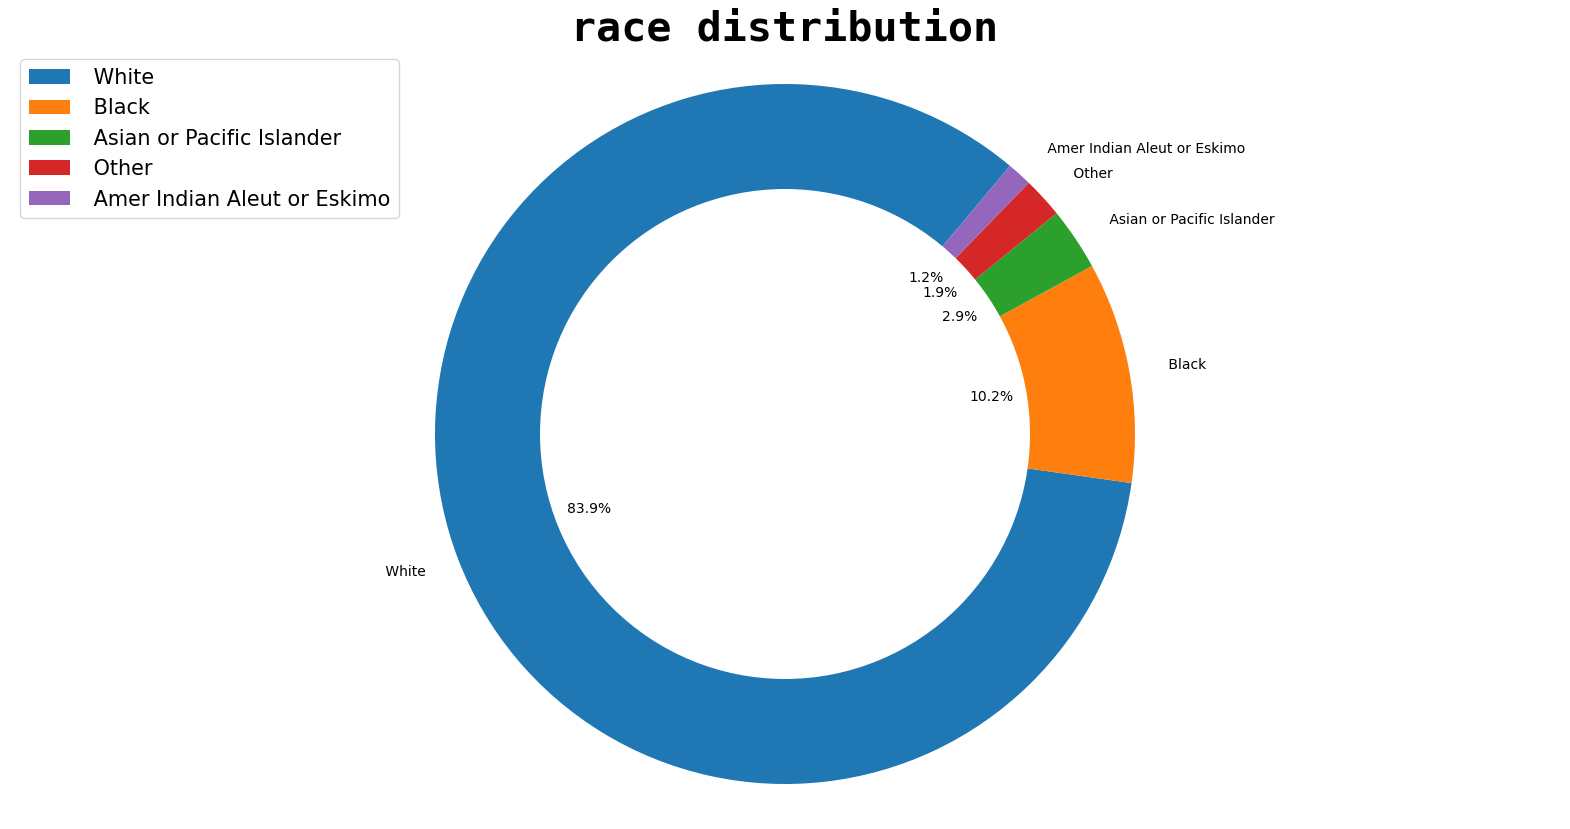

In [26]:
race = df['race'].value_counts()

plt.figure(figsize=(20, 10))
plt.pie(race.values, labels=race.index,
        startangle=50, autopct='%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('race distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 30, 'fontweight': 'bold'})
plt.axis('equal')
plt.legend(prop={'size': 15},loc='upper left')
plt.show()

<div style="border-radius:10px; border: #0080FF solid; padding: 15px; background-color: #CEF6F5; font-size:100%; text-align:left">
<font color='#0080FF'>Question 4: Is there any discrimation?</font>

In [27]:
df['race'].unique()

array([' White', ' Black', ' Asian or Pacific Islander',
       ' Amer Indian Aleut or Eskimo', ' Other'], dtype=object)

In [28]:
print('Whites having income below limit:',len(df.loc[(df['race']==' White') & (df['income_above_limit']=='Below limit')])/len(df.loc[(df['race']==' White')]) * 100, '%')
print('Non-Whites having income below limit:',len(df.loc[(df['race']!=' White') & (df['income_above_limit']=='Below limit')])/len(df.loc[(df['race']!=' White')]) * 100, '%')

Whites having income below limit: 93.26272416324719 %
Non-Whites having income below limit: 96.56703166617342 %


##### Good to see no race discrimation

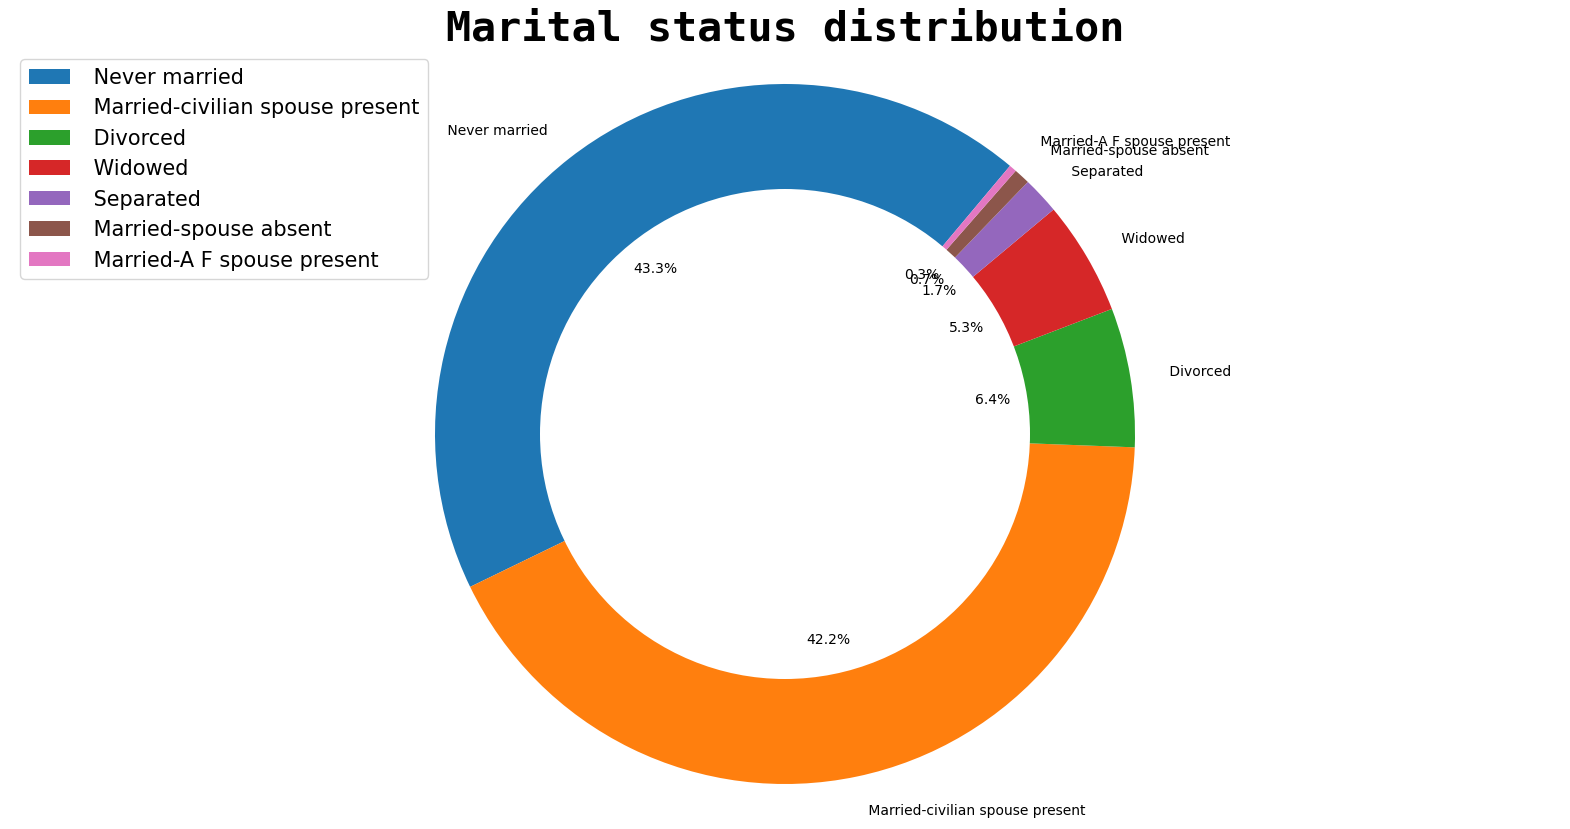

In [29]:
# Creating a donut chart for 'Marital status'
marital = df['marital_status'].value_counts()

plt.figure(figsize=(20, 10))
plt.pie(marital.values, labels=marital.index,
        startangle=50, autopct='%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Marital status distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 30, 'fontweight': 'bold'})
plt.axis('equal')
plt.legend(prop={'size': 15},loc='upper left')
plt.show()

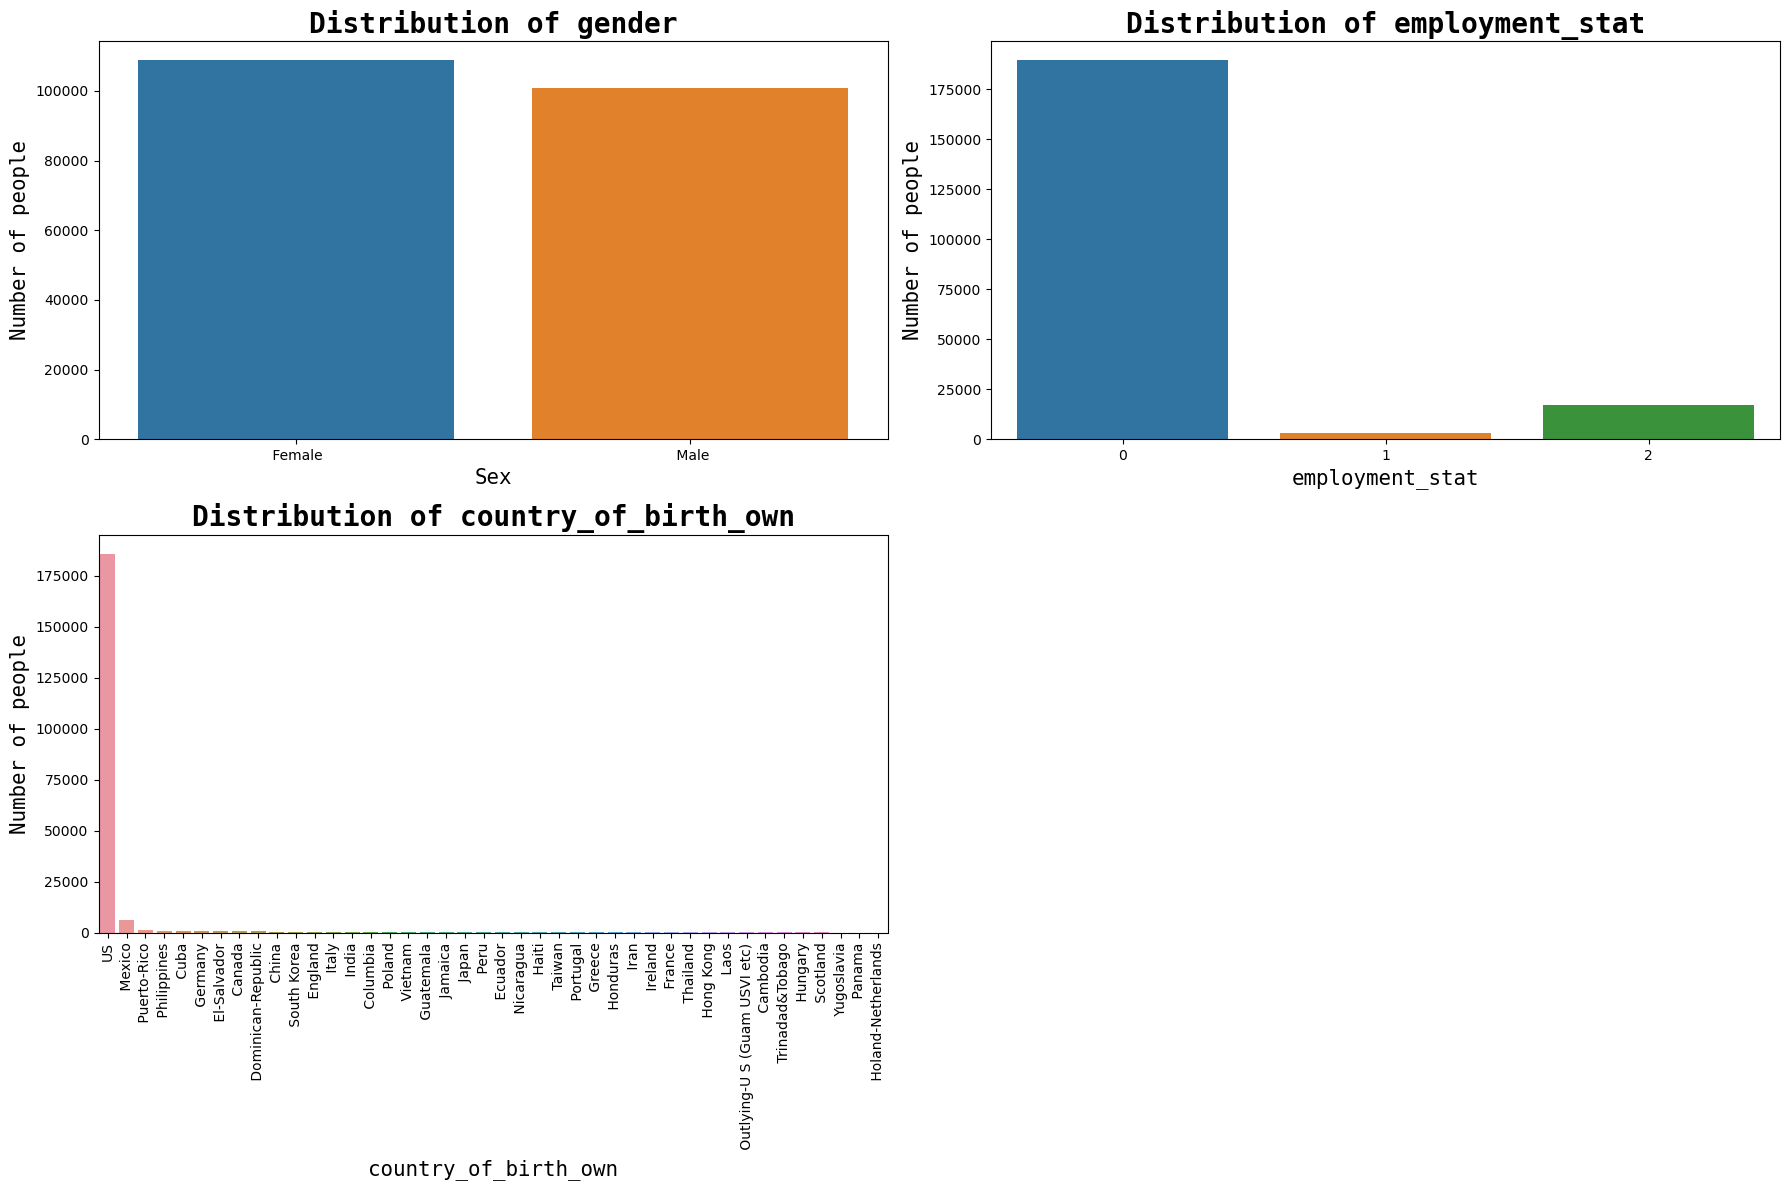

In [30]:
fig, axes = plt.subplots(2,2,figsize=(18, 12))

# Plot the distribution of gender
gender = df['gender'].value_counts()
sns.barplot(x=gender.index, y=gender.values, ax=axes[0,0])
axes[0,0].set_title('Distribution of gender', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
axes[0,0].set_xlabel('Sex', fontdict={'fontname': 'Monospace', 'fontsize': 15})
axes[0,0].set_ylabel('Number of people', fontdict={'fontname': 'Monospace', 'fontsize': 15})
axes[0,0].tick_params(labelsize=10)

# Plot the distribution of employment_stat
employment_stat = df['employment_stat'].value_counts()
sns.barplot(x=employment_stat.index, y=employment_stat.values, ax=axes[0,1])
axes[0,1].set_title('Distribution of employment_stat', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
axes[0,1].set_xlabel('employment_stat', fontdict={'fontname': 'Monospace', 'fontsize': 15})
axes[0,1].set_ylabel('Number of people', fontdict={'fontname': 'Monospace', 'fontsize': 15})
axes[0,1].tick_params(labelsize=10)

# Plot the distribution of country_of_birth_own
country_of_birth_own = df['country_of_birth_own'].value_counts()
sns.barplot(x=country_of_birth_own.index, y=country_of_birth_own.values, ax=axes[1,0])
axes[1,0].set_title('Distribution of country_of_birth_own', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
axes[1,0].set_xlabel('country_of_birth_own', fontdict={'fontname': 'Monospace', 'fontsize': 15})
axes[1,0].set_ylabel('Number of people', fontdict={'fontname': 'Monospace', 'fontsize': 15})
axes[1,0].tick_params(labelsize=10)
axes[1,0].set_xticklabels(country_of_birth_own.index, rotation=90)

axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

<div style="border-radius:10px; border: #0080FF solid; padding: 15px; background-color: #CEF6F5; font-size:100%; text-align:left">
<font color='#0080FF'>Question 4: Income inequality in gender?</font>

In [31]:
print('Males with income below limit:',len(df.loc[(df['gender']==' Male') & (df['income_above_limit']=='Below limit')])/len(df.loc[(df['gender']==' Male')]) * 100, '%')
print('Females with income below limit:',len(df.loc[(df['gender']!=' Male') & (df['income_above_limit']=='Below limit')])/len(df.loc[(df['gender']!=' Male')]) * 100, '%')

Males with income below limit: 89.86248324479969 %
Females with income below limit: 97.43712310633916 %


In [32]:
print('Males with income below limit:',len(df.loc[(df['gender']==' Male') & (df['income_above_limit']=='Below limit')]))
print('Females with income below limit:',len(df.loc[(df['gender']!=' Male') & (df['income_above_limit']=='Below limit')]))

Males with income below limit: 90505
Females with income below limit: 105996


<div class="alert alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;"> 

Not a very high difference

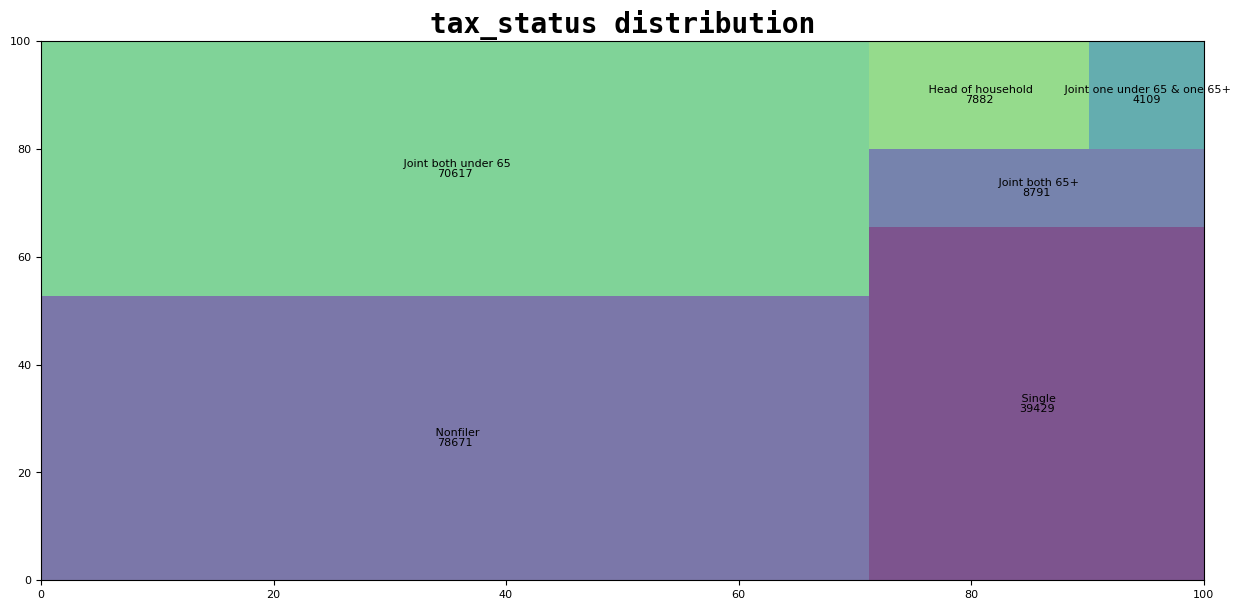

In [33]:
tax_status = df['tax_status'].value_counts()
plt.figure(figsize=(15, 7))
plt.rc('font', size=8)
squarify.plot(sizes=tax_status.values, label=tax_status.index, value=tax_status.values,alpha=0.7)
plt.title('tax_status distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.show()

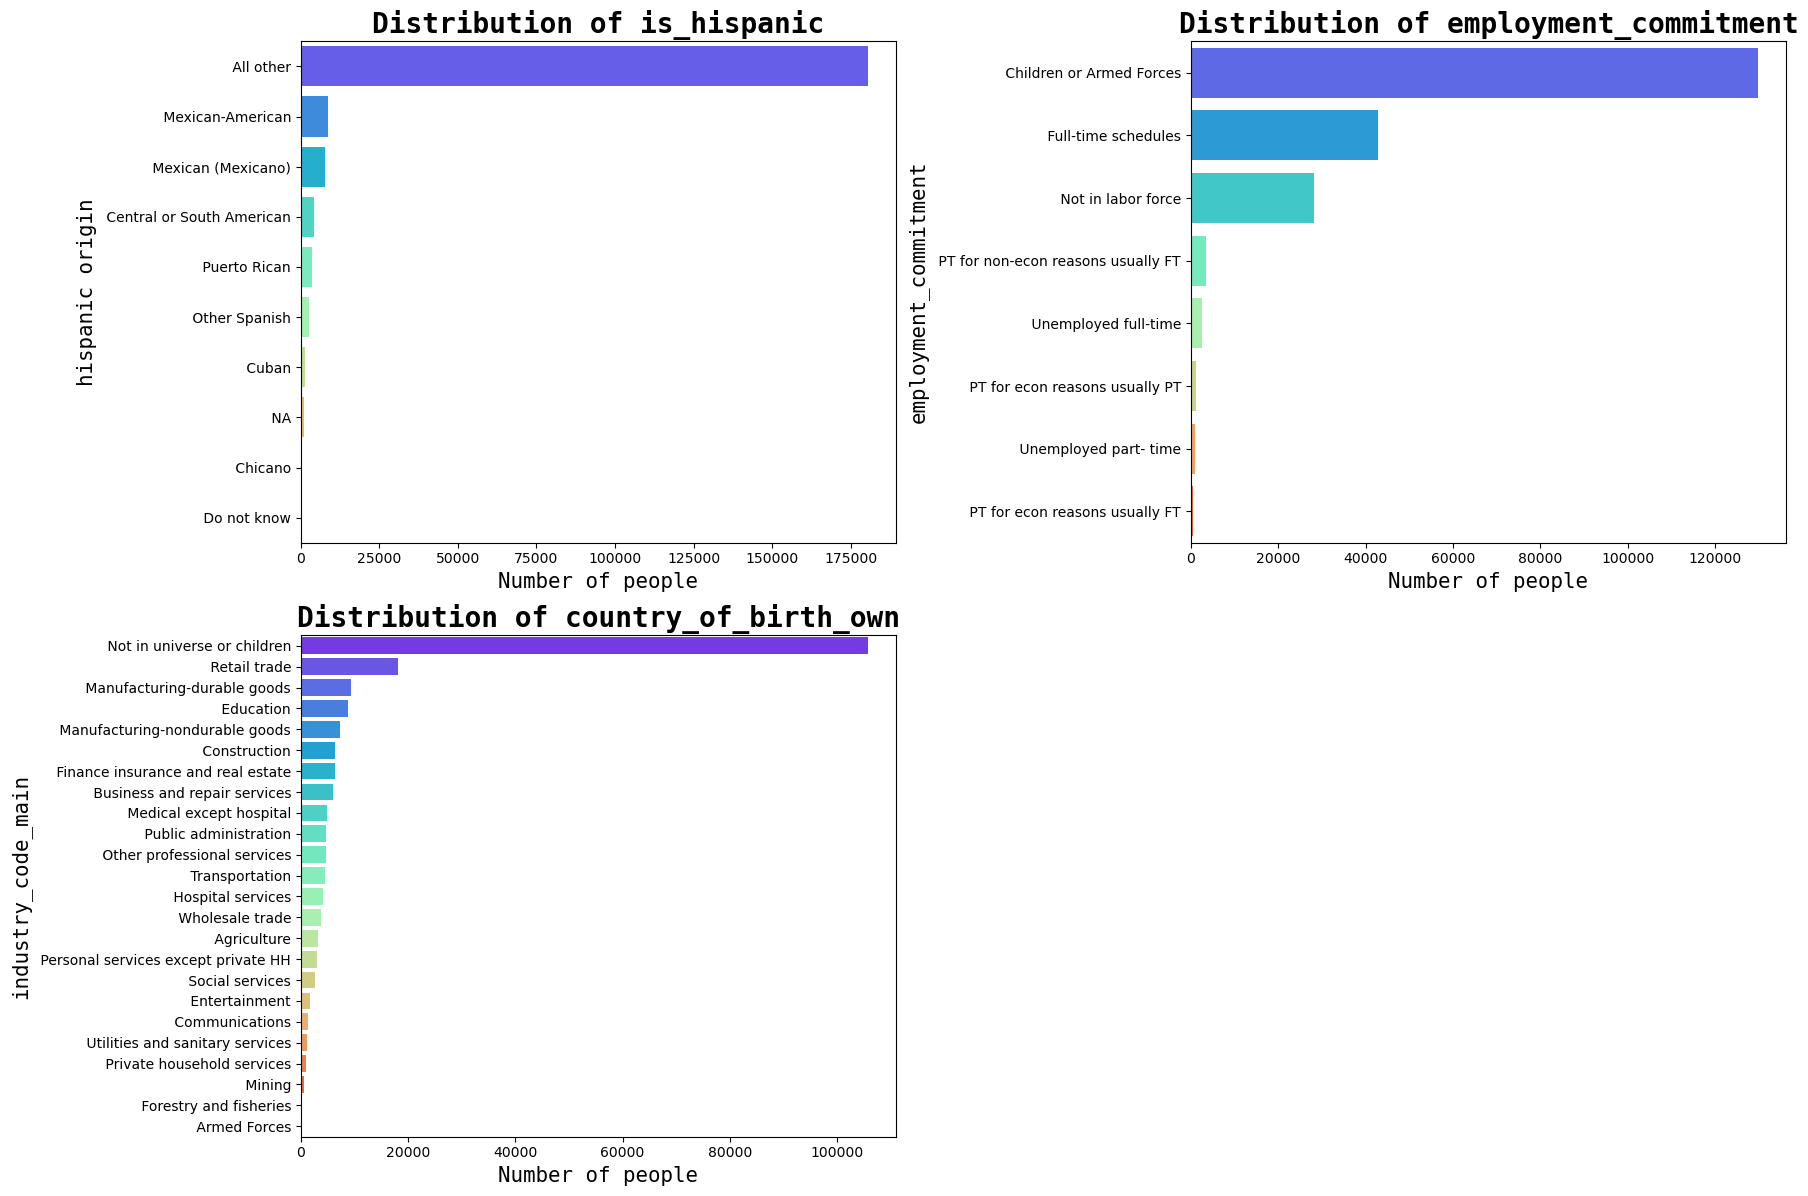

In [34]:
fig, axes = plt.subplots(2,2,figsize=(18, 12))

# Plot the distribution of gender
is_hispanic = df['is_hispanic'].value_counts()
sns.barplot(x=is_hispanic.values, y=is_hispanic.index, palette='rainbow', ax=axes[0,0])
axes[0,0].set_title('Distribution of is_hispanic', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
axes[0,0].set_xlabel('Number of people', fontdict={'fontname': 'Monospace', 'fontsize': 15})
axes[0,0].set_ylabel('hispanic origin', fontdict={'fontname': 'Monospace', 'fontsize': 15})
axes[0,0].tick_params(labelsize=10)

# Plot the distribution of employment_stat
employment_commitment = df['employment_commitment'].value_counts()
sns.barplot(x=employment_commitment.values, y=employment_commitment.index, palette='rainbow', ax=axes[0,1])
axes[0,1].set_title('Distribution of employment_commitment', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
axes[0,1].set_xlabel('Number of people', fontdict={'fontname': 'Monospace', 'fontsize': 15})
axes[0,1].set_ylabel('employment_commitment', fontdict={'fontname': 'Monospace', 'fontsize': 15})
axes[0,1].tick_params(labelsize=10)

# Plot the distribution of country_of_birth_own
industry_code_main = df['industry_code_main'].value_counts()
sns.barplot(x=industry_code_main.values, y=industry_code_main.index, palette='rainbow', ax=axes[1,0])
axes[1,0].set_title('Distribution of country_of_birth_own', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
axes[1,0].set_xlabel('Number of people', fontdict={'fontname': 'Monospace', 'fontsize': 15})
axes[1,0].set_ylabel('industry_code_main', fontdict={'fontname': 'Monospace', 'fontsize': 15})
axes[1,0].tick_params(labelsize=10)

axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

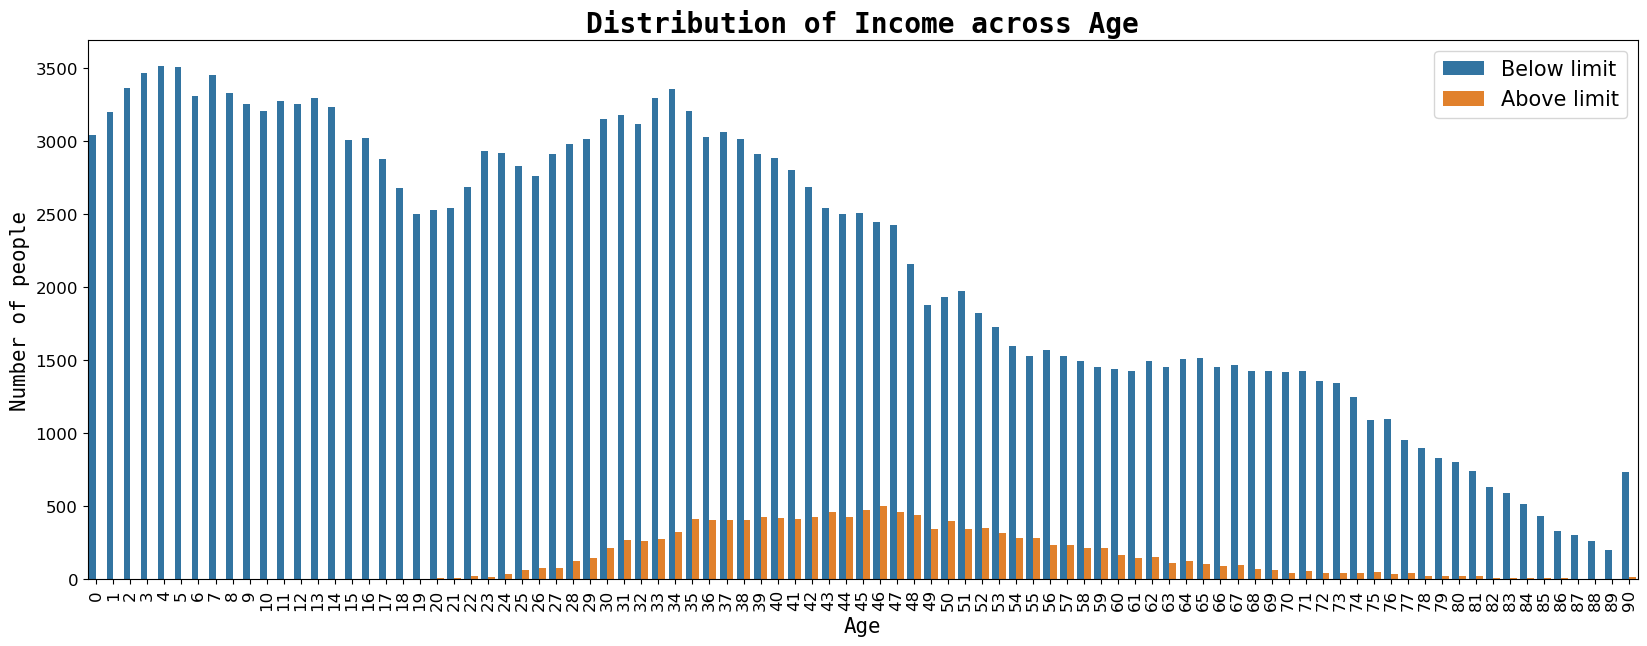

In [35]:
# Creating a countplot of income across age
plt.figure(figsize=(20, 7))
sns.countplot(x=df['age'], hue=df['income_above_limit'])
plt.title('Distribution of Income across Age', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Age', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.xticks(rotation=90)
plt.legend(loc=1, prop={'size': 15})
plt.show()

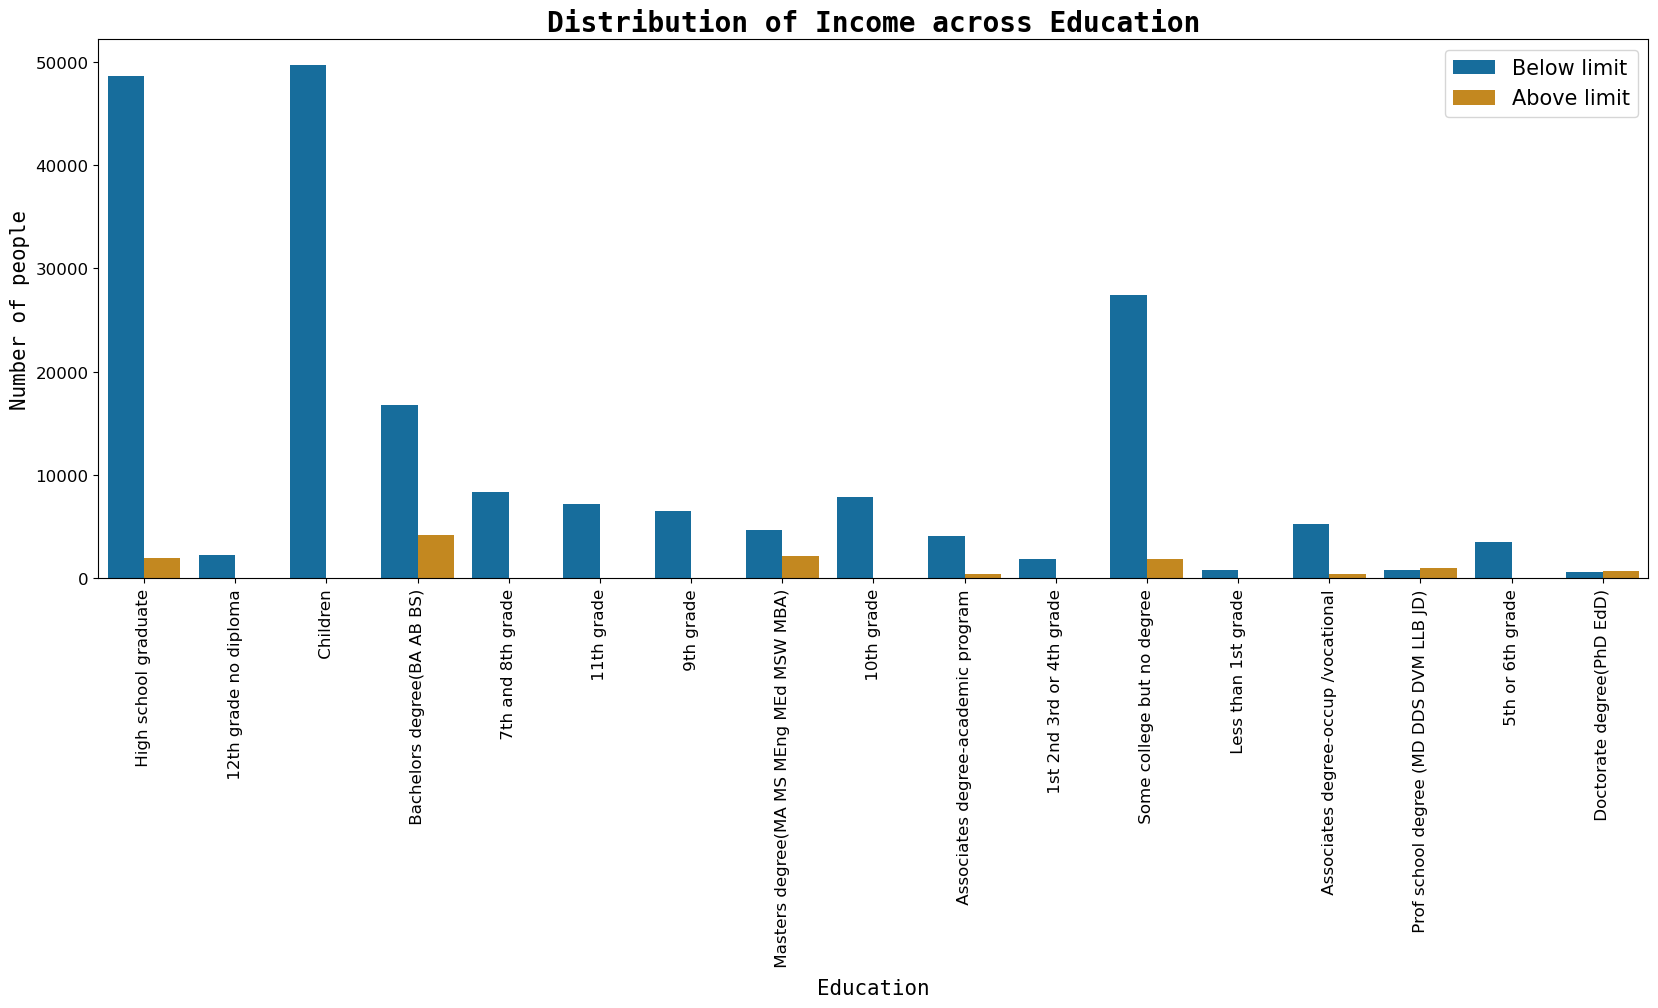

In [36]:
# Creating a countplot of income across education
plt.figure(figsize=(20, 7))
sns.countplot(x=df['education'],
              hue=df['income_above_limit'], palette='colorblind')
plt.title('Distribution of Income across Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Education', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.xticks(rotation=90)
plt.legend(loc=1, prop={'size': 15})
plt.show()

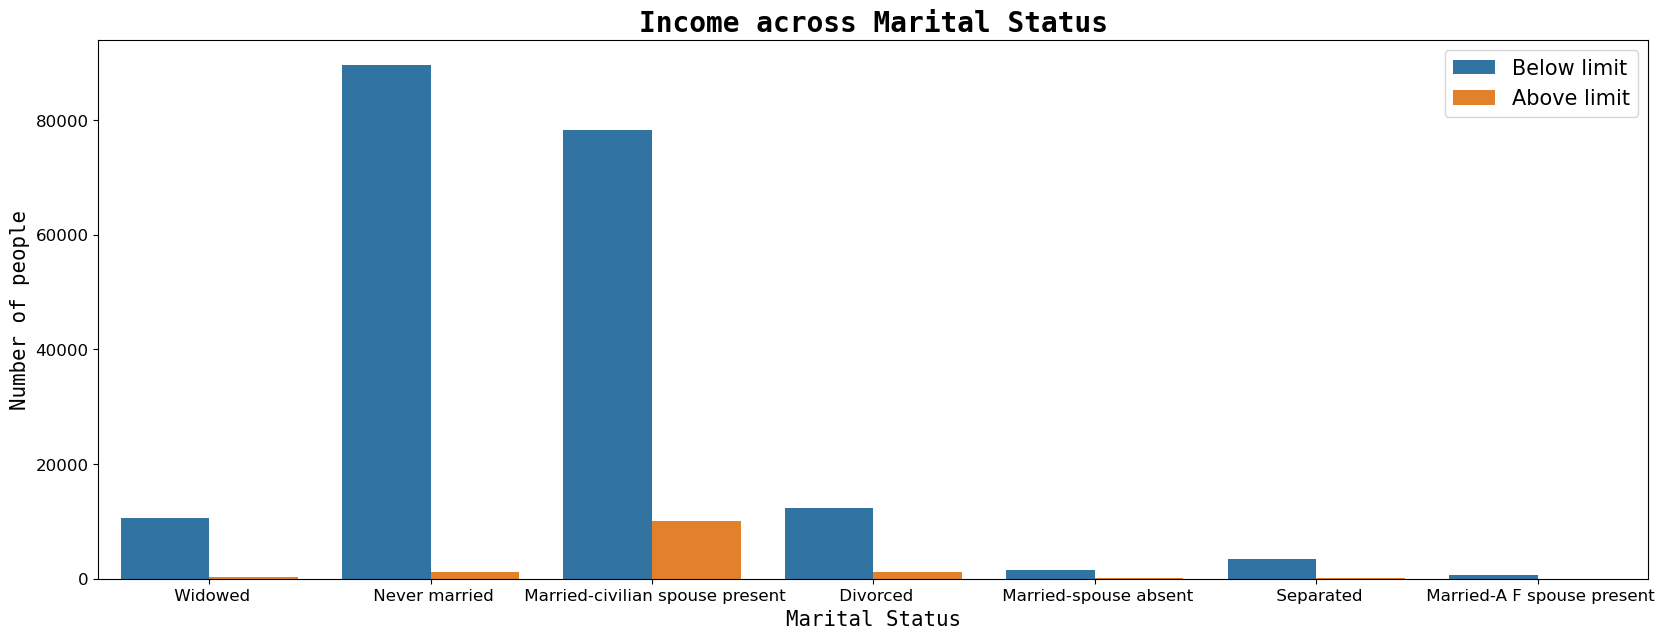

In [37]:
# Creating a countplot of income across Marital Status
plt.figure(figsize=(20, 7))
sns.countplot(x=df['marital_status'], hue=df['income_above_limit'])
plt.title('Income across Marital Status', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Marital Status', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

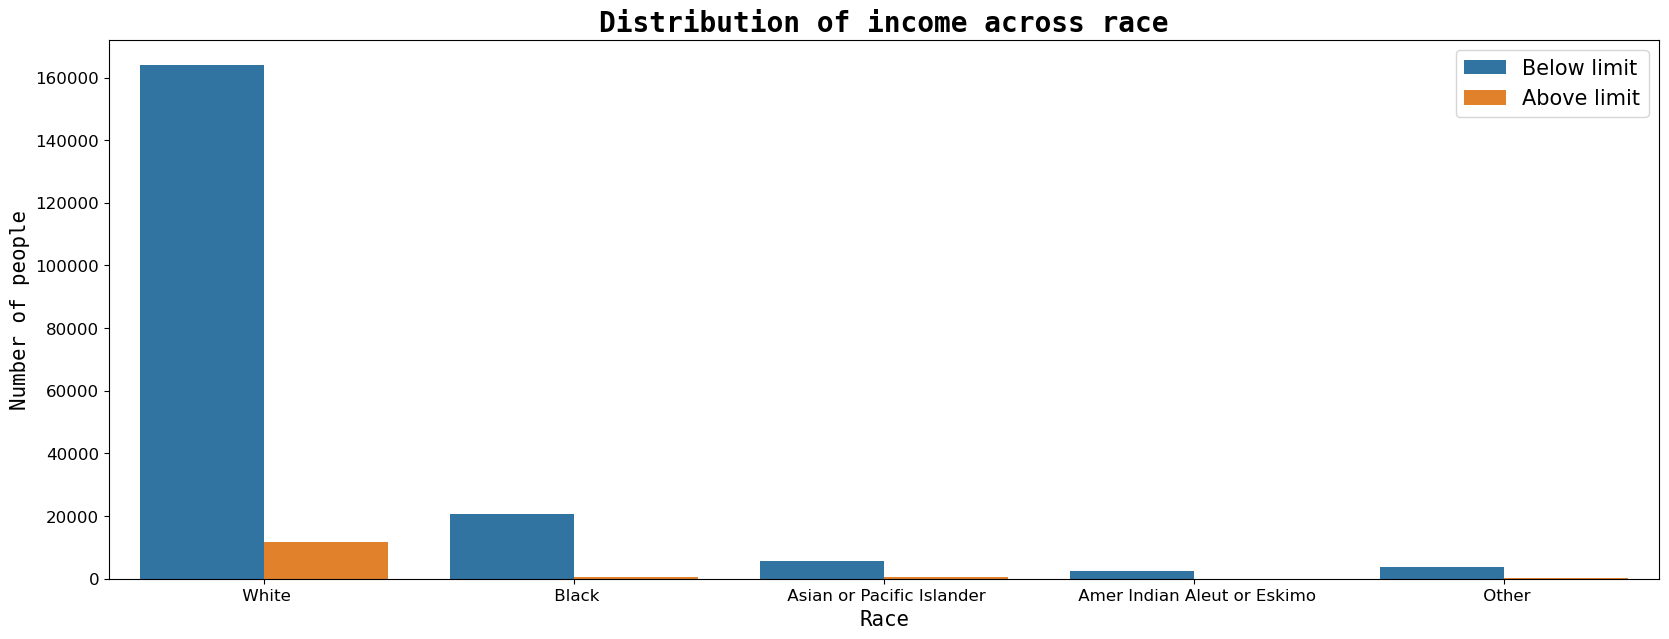

In [38]:
# Creating a countplot of income across race
plt.figure(figsize=(20, 7))
sns.countplot(x=df['race'], hue=df['income_above_limit'])
plt.title('Distribution of income across race', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Race', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

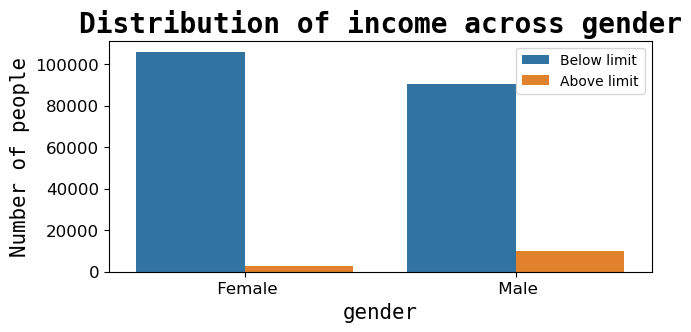

In [39]:
# Creating a countplot of income across sex
plt.figure(figsize=(7, 3))
sns.countplot(x=df['gender'], hue=df['income_above_limit'])
plt.title('Distribution of income across gender', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('gender', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 10})
plt.savefig('bi3.png')
plt.show()

In [41]:
df.replace({'Below limit':0,'Above limit':1},inplace=True)

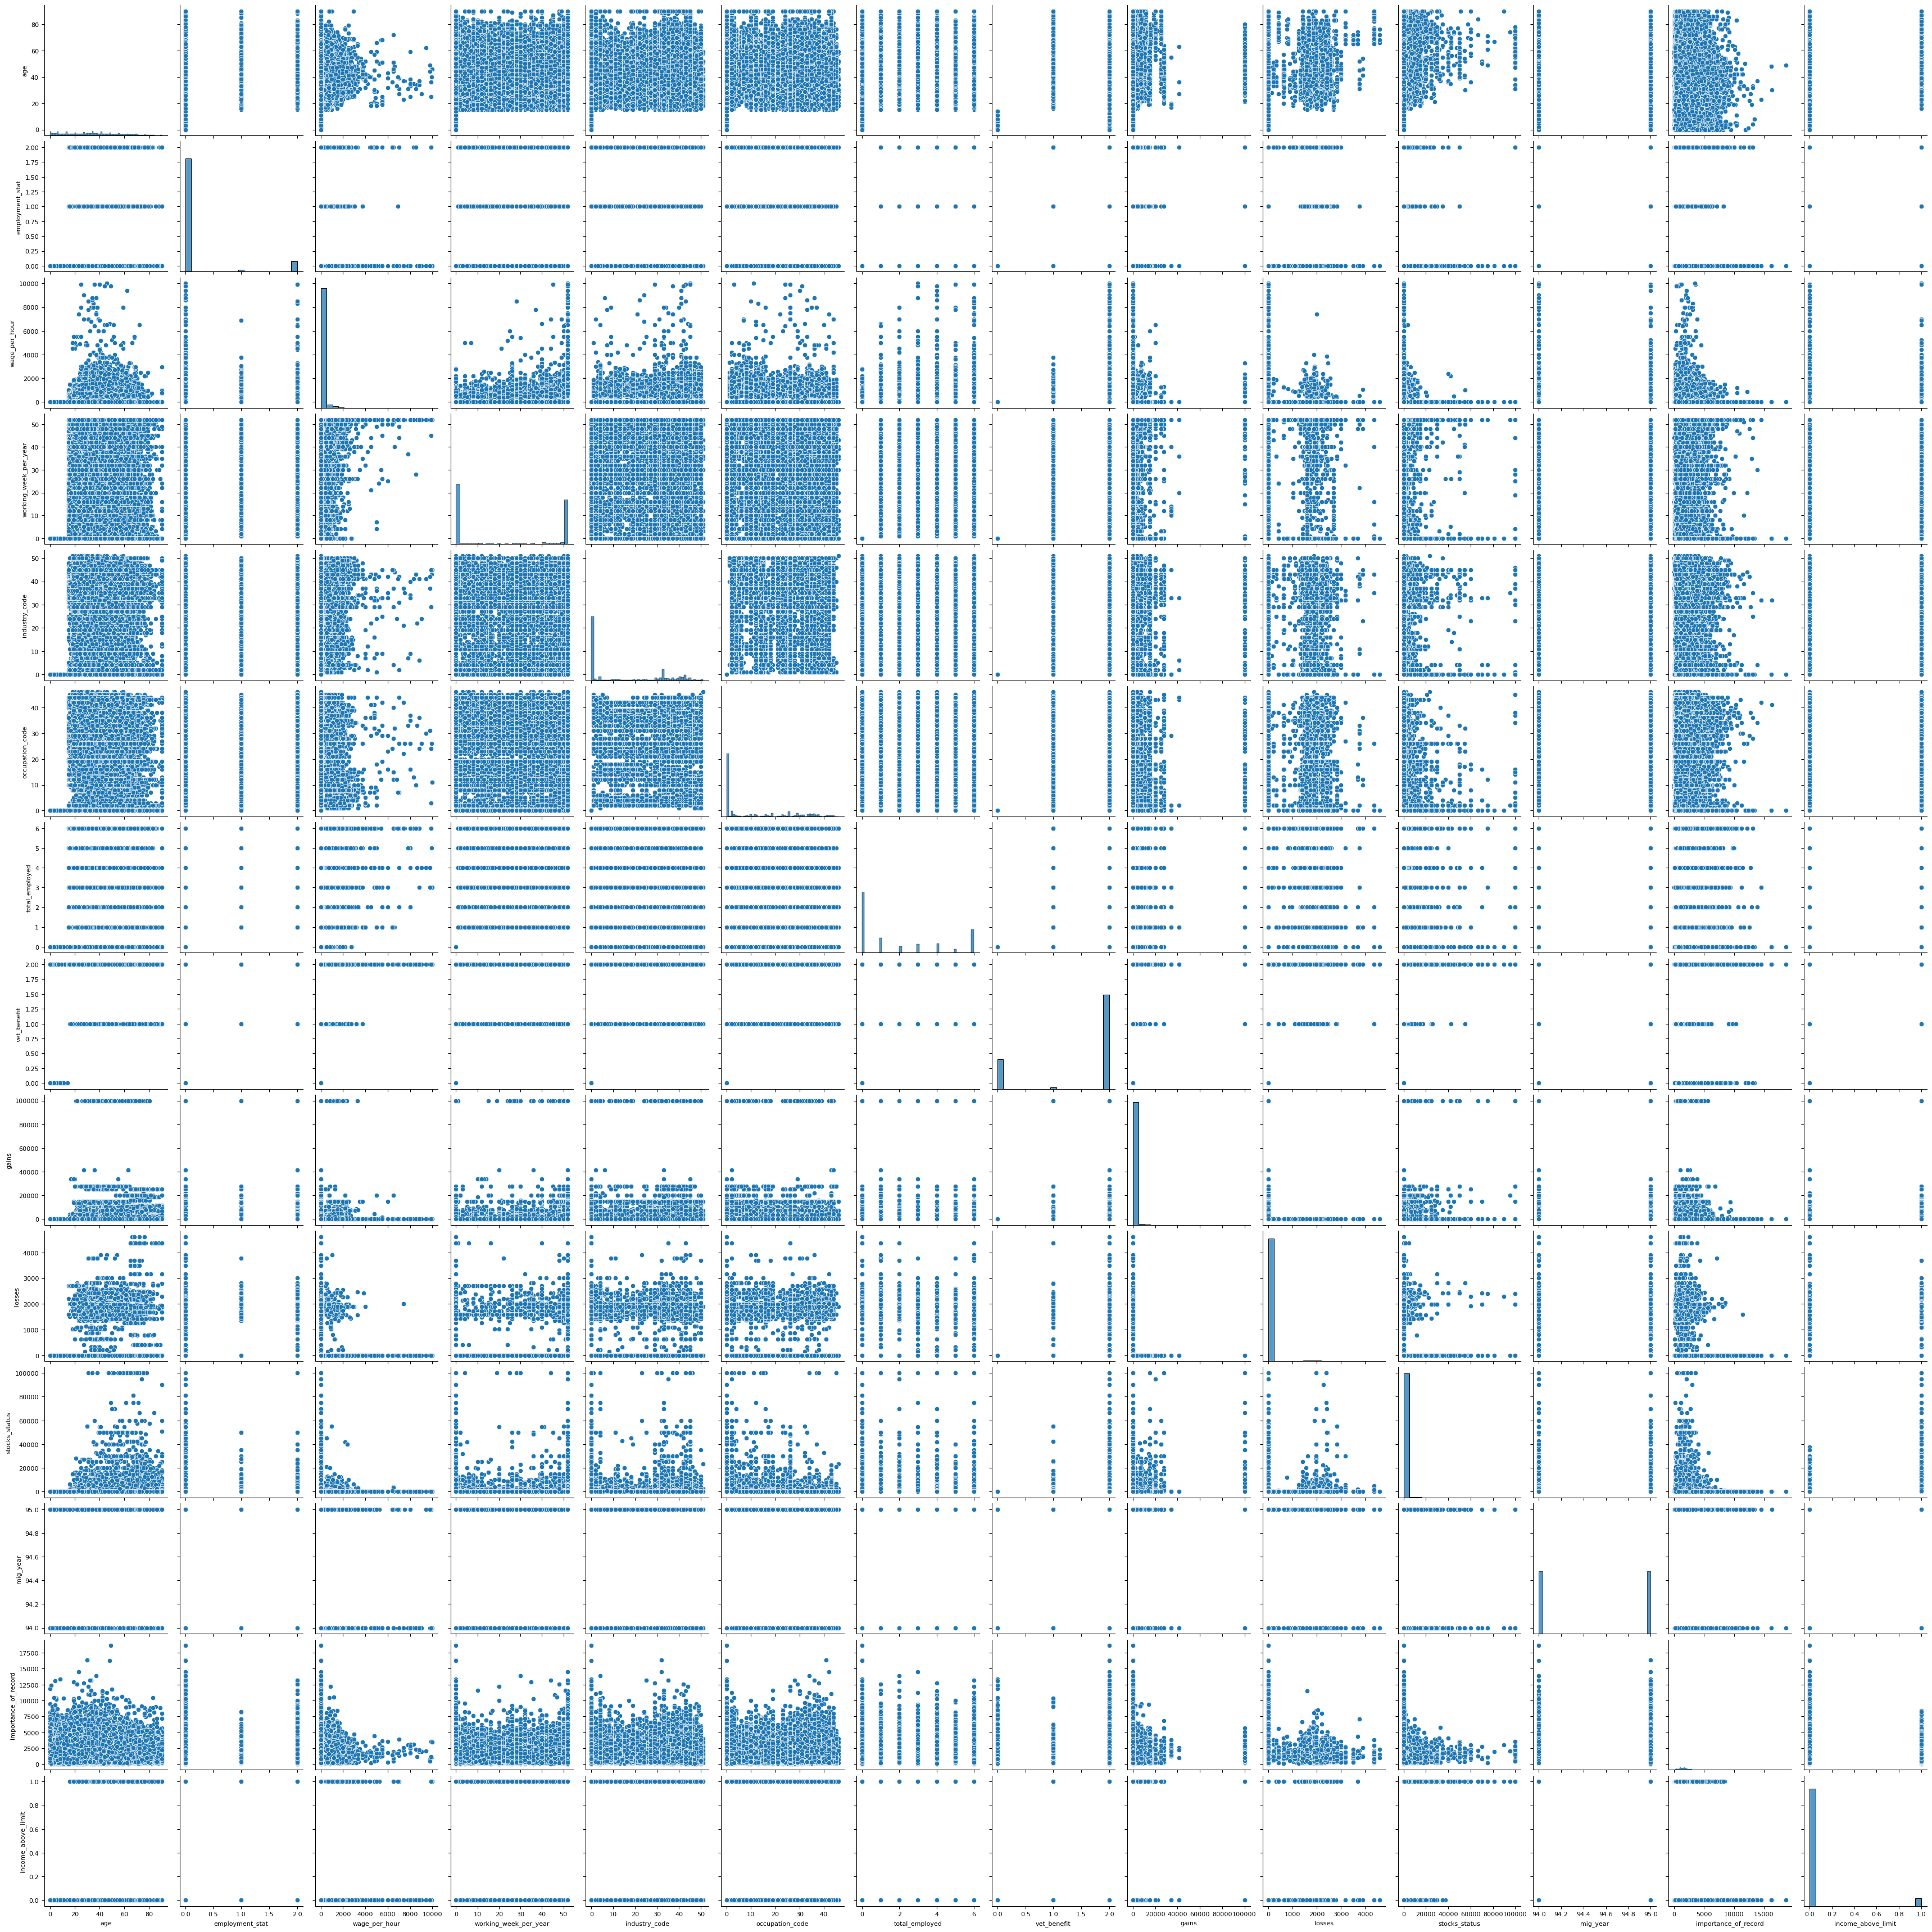

In [42]:
# Creating a pairplot of dataset
sns.pairplot(df)
plt.show()

array([<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>], dtype=object)

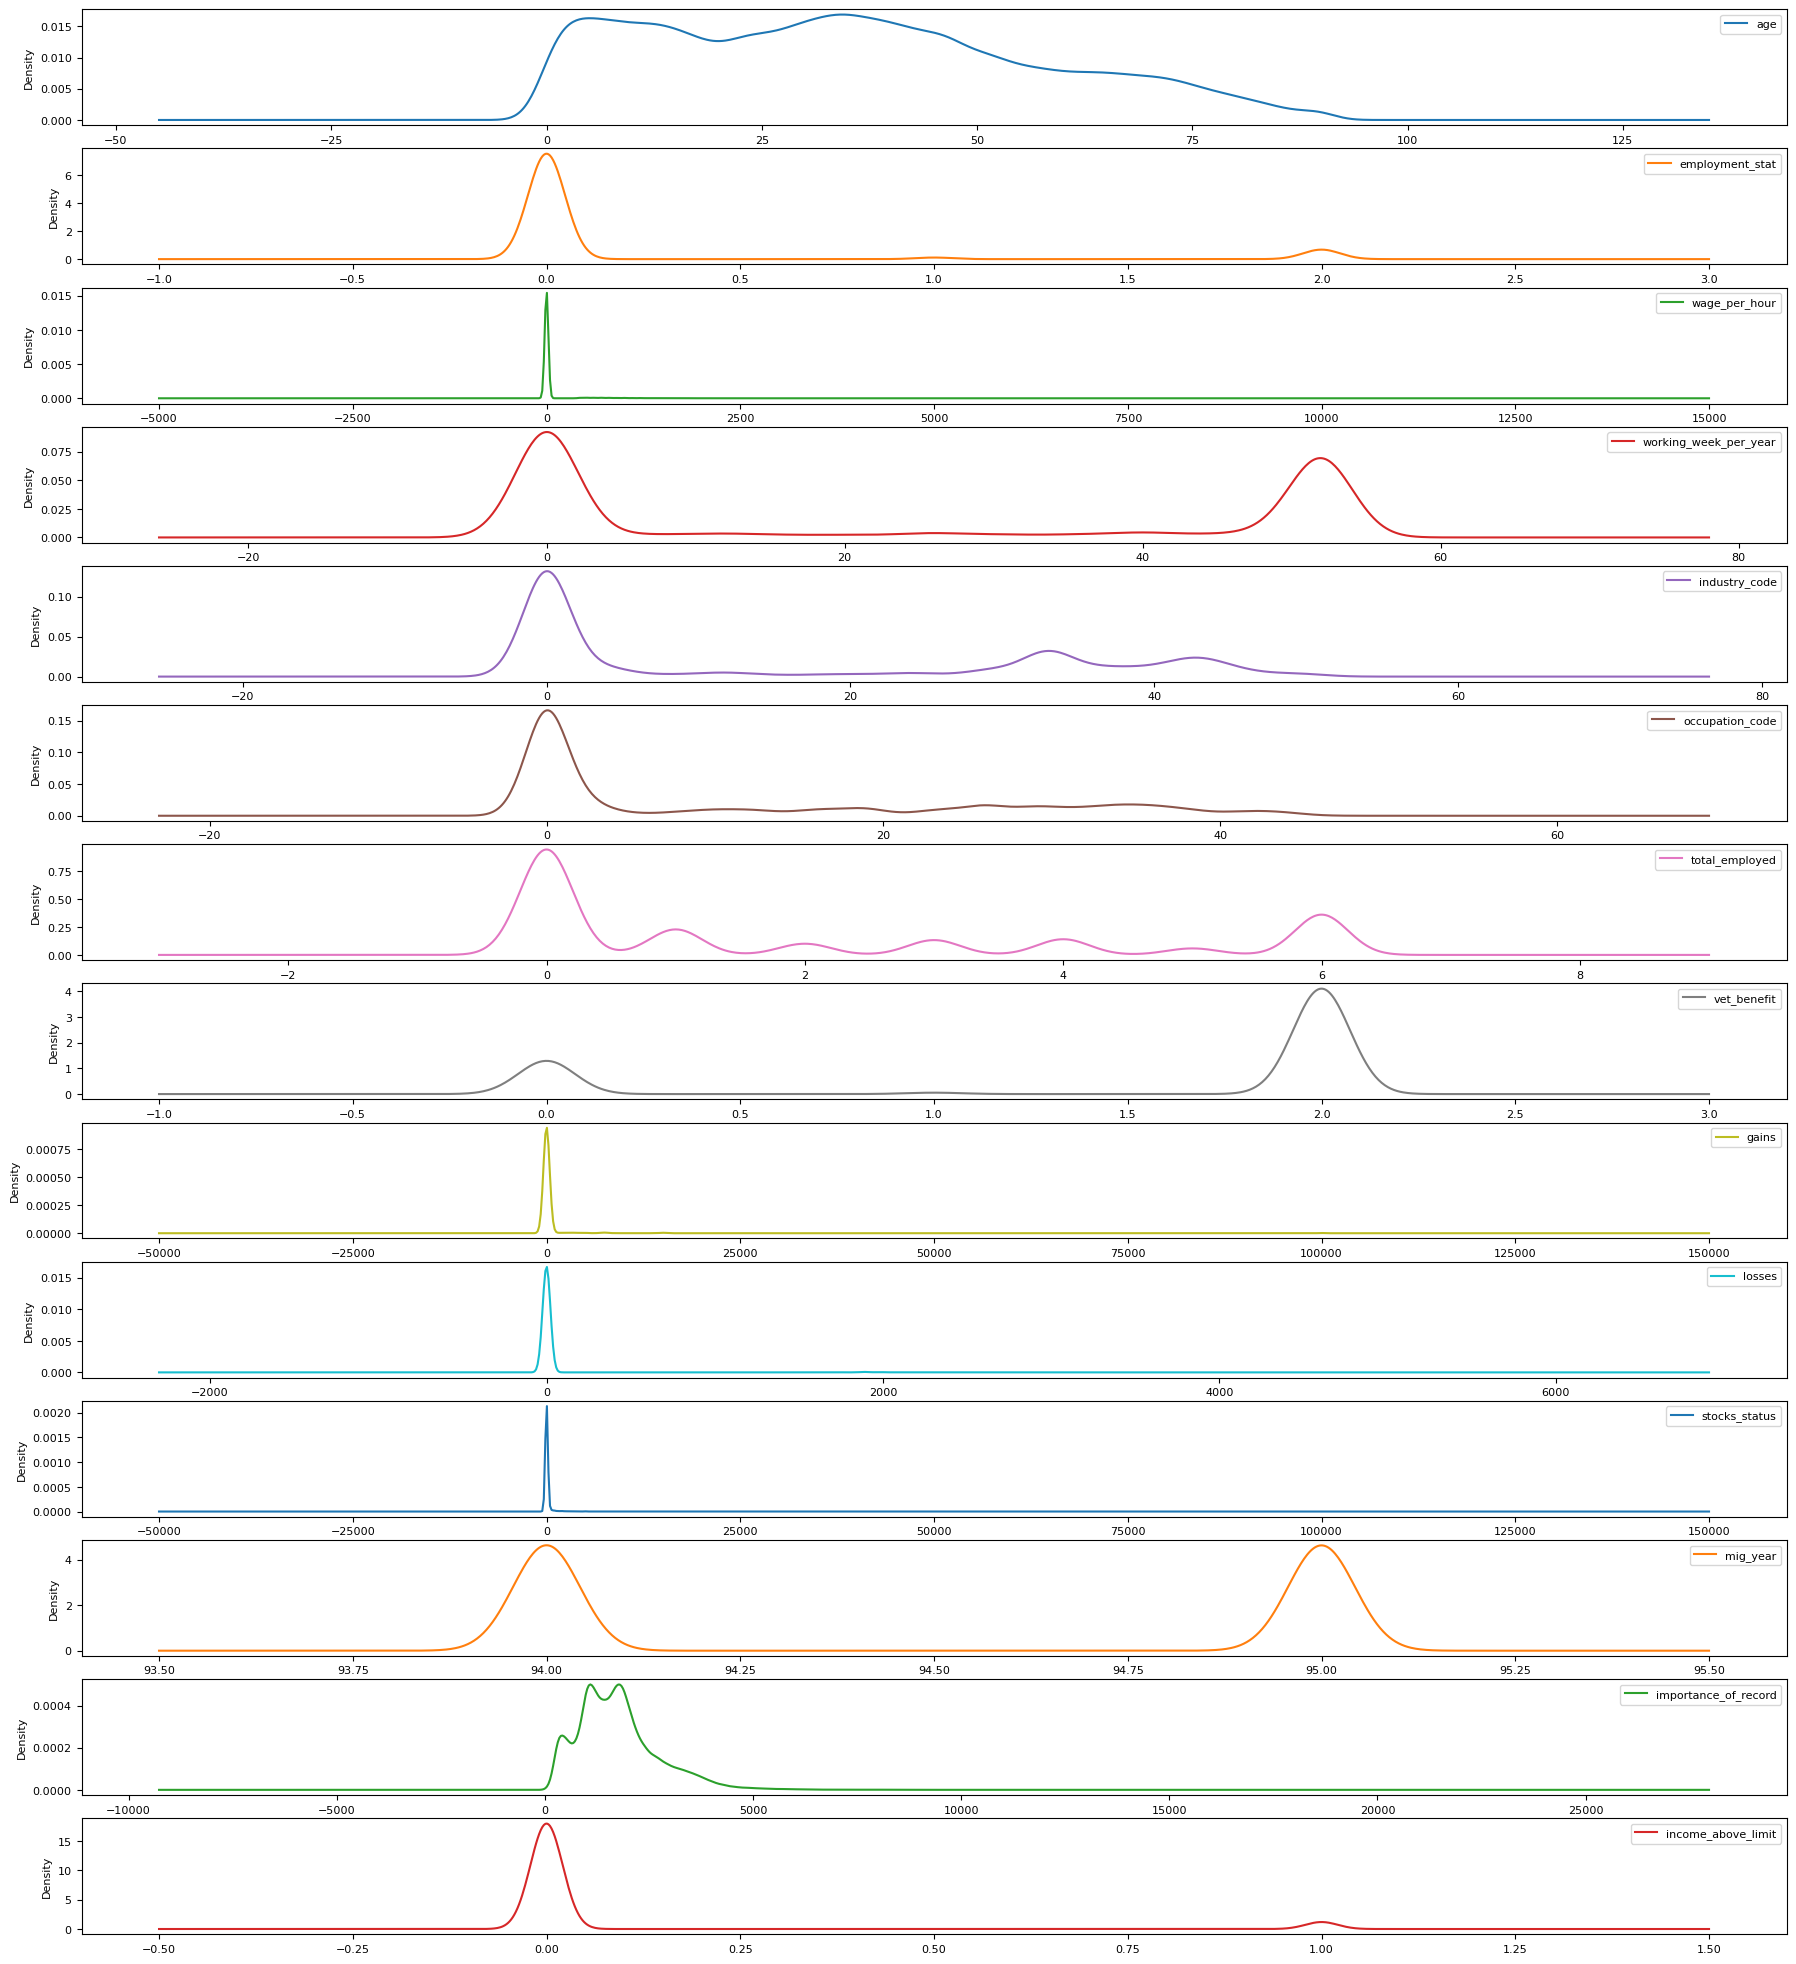

In [43]:
df.plot(kind="density", 
        subplots=True, 
          figsize=(22,25),
         sharex=False, 
         sharey=False
        
        )

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>💡 Observations:</font></h3>
    
In this dataset, the most number of people are young, white, male, high school graduates working 50 weeks per year.

From the correlation heatmap, we can see that the dependent feature 'income' is highly correlated with capital gains, total_employed, industry code, working week per year

# <span style="font-family:cursive;text-align:center">⚙️ Data Preprocessing</span>

### <span style="font-family:cursive;text-align:center">Null values handling</span>

In [44]:
# Checking null values
round((df.isna().sum() / df.shape[0]) * 100, 2).astype(str) + ' %'

ID                                  0.0 %
age                                 0.0 %
gender                              0.0 %
education                           0.0 %
class                             50.24 %
education_institute               93.65 %
marital_status                      0.0 %
race                                0.0 %
is_hispanic                         0.0 %
employment_commitment               0.0 %
unemployment_reason               96.89 %
employment_stat                     0.0 %
wage_per_hour                       0.0 %
is_labor_union                    90.42 %
working_week_per_year               0.0 %
industry_code                       0.0 %
industry_code_main                  0.0 %
occupation_code                     0.0 %
occupation_code_main              50.45 %
total_employed                      0.0 %
household_stat                      0.0 %
household_summary                   0.0 %
under_18_family                   72.39 %
veterans_admin_questionnaire      

In [45]:
# dropping columns with too much nan values i.e more than 50%
nan_cols_drop  = []
for cols in df.columns:
    if df[cols].isna().sum()/df.shape[0] >0.5:
        nan_cols_drop.append(cols)

In [46]:
print(f'We will drop the following columns from data: ')
print(nan_cols_drop)

We will drop the following columns from data: 
['class', 'education_institute', 'unemployment_reason', 'is_labor_union', 'occupation_code_main', 'under_18_family', 'veterans_admin_questionnaire', 'migration_code_change_in_msa', 'migration_prev_sunbelt', 'migration_code_move_within_reg', 'migration_code_change_in_reg', 'residence_1_year_ago', 'old_residence_reg', 'old_residence_state']


In [47]:
print('The shape of data before dropping columns with high proportion of NaN values is - ')
print(f'The shape of data is {df.shape}')

df = df.drop(nan_cols_drop,axis=1)

print('---------------------------------------------------------------------------------------------------\n')
print('The shape of data after dropping columns with high proportion of NaN values is - ')
print(f'The shape of data is {df.shape}')

The shape of data before dropping columns with high proportion of NaN values is - 
The shape of data is (209499, 43)
---------------------------------------------------------------------------------------------------

The shape of data after dropping columns with high proportion of NaN values is - 
The shape of data is (209499, 29)


In [48]:
round((df.isna().sum() / df.shape[0]) * 100, 2).astype(str) + ' %'

ID                          0.0 %
age                         0.0 %
gender                      0.0 %
education                   0.0 %
marital_status              0.0 %
race                        0.0 %
is_hispanic                 0.0 %
employment_commitment       0.0 %
employment_stat             0.0 %
wage_per_hour               0.0 %
working_week_per_year       0.0 %
industry_code               0.0 %
industry_code_main          0.0 %
occupation_code             0.0 %
total_employed              0.0 %
household_stat              0.0 %
household_summary           0.0 %
vet_benefit                 0.0 %
tax_status                  0.0 %
gains                       0.0 %
losses                      0.0 %
stocks_status               0.0 %
citizenship                 0.0 %
mig_year                    0.0 %
country_of_birth_own       1.75 %
country_of_birth_father    3.43 %
country_of_birth_mother    3.11 %
importance_of_record        0.0 %
income_above_limit          0.0 %
dtype: object

<div class="alert alert-danger" style="font-size:14px; font-family:verdana; line-height: 1.7em;"> 

Country of birth own, father, mother are not some columns that may have any affect on model

In [49]:
df = df.drop(['country_of_birth_own','country_of_birth_father','country_of_birth_mother'],axis=1)

In [50]:
round((df.isna().sum() / df.shape[0]) * 100, 2).astype(str) + ' %'

ID                       0.0 %
age                      0.0 %
gender                   0.0 %
education                0.0 %
marital_status           0.0 %
race                     0.0 %
is_hispanic              0.0 %
employment_commitment    0.0 %
employment_stat          0.0 %
wage_per_hour            0.0 %
working_week_per_year    0.0 %
industry_code            0.0 %
industry_code_main       0.0 %
occupation_code          0.0 %
total_employed           0.0 %
household_stat           0.0 %
household_summary        0.0 %
vet_benefit              0.0 %
tax_status               0.0 %
gains                    0.0 %
losses                   0.0 %
stocks_status            0.0 %
citizenship              0.0 %
mig_year                 0.0 %
importance_of_record     0.0 %
income_above_limit       0.0 %
dtype: object

age                         Axes(0.125,0.825775;0.032563x0.0542254)
employment_stat          Axes(0.164076,0.825775;0.032563x0.0542254)
wage_per_hour            Axes(0.203151,0.825775;0.032563x0.0542254)
working_week_per_year    Axes(0.242227,0.825775;0.032563x0.0542254)
industry_code            Axes(0.281303,0.825775;0.032563x0.0542254)
occupation_code          Axes(0.320378,0.825775;0.032563x0.0542254)
total_employed           Axes(0.359454,0.825775;0.032563x0.0542254)
vet_benefit              Axes(0.398529,0.825775;0.032563x0.0542254)
gains                    Axes(0.437605,0.825775;0.032563x0.0542254)
losses                   Axes(0.476681,0.825775;0.032563x0.0542254)
stocks_status            Axes(0.515756,0.825775;0.032563x0.0542254)
mig_year                 Axes(0.554832,0.825775;0.032563x0.0542254)
importance_of_record     Axes(0.593908,0.825775;0.032563x0.0542254)
income_above_limit       Axes(0.632983,0.825775;0.032563x0.0542254)
dtype: object

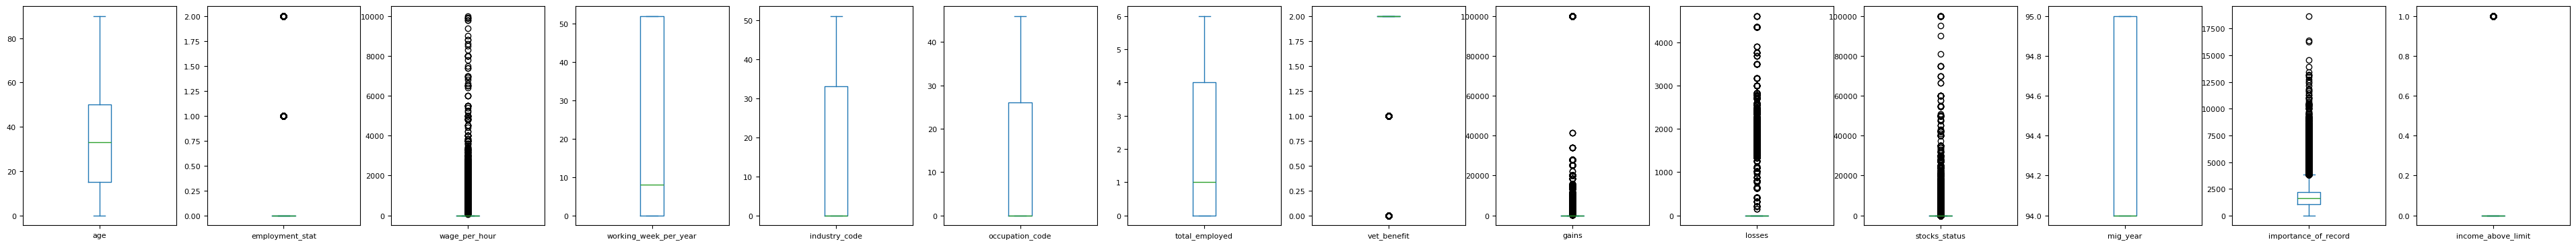

In [51]:
df.plot(kind="box", 
        vert=True,
        subplots=True,
        layout = (12,20),
        figsize=(70,60),
        sharex=False, 
        sharey=False 
        )

<div class="alert alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;"> 

Some of the possible ways to tackle this outlier is to transform values, clip values, drop values or to retain information

<div class="alert alert-danger" style="font-size:14px; font-family:verdana; line-height: 1.7em;"> 

* Clipping doesn't seem nice option as it will delete the correct information
* We will check the number of outliers per column to see what can be done

In [52]:
for i in ['wage_per_hour','gains','losses','stocks_status','importance_of_record']:
    
    IQR=df[i].quantile(0.75)-df[i].quantile(0.25)
    lower_bridge=df[i].quantile(0.25)-(IQR*1.5)
    upper_bridge=df[i].quantile(0.75)+(IQR*1.5)
    
    outs = []
    
    for j in df[i]:
        if j<lower_bridge:
            outs.append(j)
    
    for k in df[i]:
        if k>upper_bridge:
            outs.append(k)

    print(f'The percentage of outliers in {i}:',(len(outs)/len(df)*100),'%')

The percentage of outliers in wage_per_hour: 5.659215557114831 %
The percentage of outliers in gains: 3.7374880071026593 %
The percentage of outliers in losses: 1.9389114029183911 %
The percentage of outliers in stocks_status: 10.516517978606103 %
The percentage of outliers in importance_of_record: 3.22626838314264 %


<div class="alert alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">

As the outliers percent are less we will proceed with retaining information and check if transformation can help

<div class="alert alert-danger" style="font-size:14px; font-family:verdana; line-height: 1.7em;">Task 1: Can any transformation methods help in improving the models?

In [53]:
df.head()

ID  age   gender               education  \
0  ID_TZ0000   79   Female    High school graduate   
1  ID_TZ0001   65   Female    High school graduate   
2  ID_TZ0002   21     Male   12th grade no diploma   
3  ID_TZ0003    2   Female                Children   
4  ID_TZ0004   70     Male    High school graduate   

                     marital_status                        race is_hispanic  \
0                           Widowed                       White   All other   
1                           Widowed                       White   All other   
2                     Never married                       Black   All other   
3                     Never married   Asian or Pacific Islander   All other   
4   Married-civilian spouse present                       White   All other   

       employment_commitment  employment_stat  wage_per_hour  \
0         Not in labor force                0              0   
1   Children or Armed Forces                0              0   
2   Children or Armed Forces                0            500   
3   Children or Armed Forces                0              0   
4         Not in labor force                0              0   

   working_week_per_year  industry_code            industry_code_main  \
0                     52              0   Not in universe or children   
1                      0              0   Not in universe or children   
2                     15             41             Hospital services   
3                      0              0   Not in universe or children   
4                      0              0   Not in universe or children   

   occupation_code  total_employed                            household_stat  \
0                0               2                               Householder   
1                0               0                     Nonfamily householder   
2               26               4   Child 18+ never marr Not in a subfamily   
3                0               0     Child <18 never marr not in subfamily   
4                0               0                     Spouse of householder   

               household_summary  vet_benefit          tax_status  gains  \
0                    Householder            2   Head of household      0   
1                    Householder            2              Single      0   
2              Child 18 or older            2              Single      0   
3   Child under 18 never married            0            Nonfiler      0   
4          Spouse of householder            2      Joint both 65+      0   

   losses  stocks_status citizenship  mig_year  importance_of_record  \
0       0            292      Native        95               1779.74   
1       0              0      Native        94               2366.75   
2       0              0      Native        94               1693.42   
3       0              0      Native        94               1380.27   
4       0              0      Native        95               1580.79   

   income_above_limit  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0

In [54]:
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
categorical_feature = [feature for feature in df.columns if feature not in numerical_feature]

for i in categorical_feature[1:]:
    print(i,df[i].unique(),'\n')

gender [' Female' ' Male'] 

education [' High school graduate' ' 12th grade no diploma' ' Children'
 ' Bachelors degree(BA AB BS)' ' 7th and 8th grade' ' 11th grade'
 ' 9th grade' ' Masters degree(MA MS MEng MEd MSW MBA)' ' 10th grade'
 ' Associates degree-academic program' ' 1st 2nd 3rd or 4th grade'
 ' Some college but no degree' ' Less than 1st grade'
 ' Associates degree-occup /vocational'
 ' Prof school degree (MD DDS DVM LLB JD)' ' 5th or 6th grade'
 ' Doctorate degree(PhD EdD)'] 

marital_status [' Widowed' ' Never married' ' Married-civilian spouse present'
 ' Divorced' ' Married-spouse absent' ' Separated'
 ' Married-A F spouse present'] 

race [' White' ' Black' ' Asian or Pacific Islander'
 ' Amer Indian Aleut or Eskimo' ' Other'] 

is_hispanic [' All other' ' Mexican-American' ' Central or South American'
 ' Mexican (Mexicano)' ' Puerto Rican' ' Other Spanish' ' NA' ' Cuban'
 ' Do not know' ' Chicano'] 

employment_commitment [' Not in labor force' ' Children or Armed Forc

In [55]:
df.drop(columns=['household_stat'],axis=1,inplace=True)

In [56]:
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
categorical_feature = [feature for feature in df.columns if feature not in numerical_feature]

In [57]:
print('The class Imbalance in the data is given below')
print(df['income_above_limit'].value_counts(),'\n')
print('The class imbalance in terms of percentage is given below ')
print(f"{df['income_above_limit'].value_counts(normalize=True)*100}")

The class Imbalance in the data is given below
income_above_limit
0    196501
1     12998
Name: count, dtype: int64 

The class imbalance in terms of percentage is given below 
income_above_limit
0    93.795674
1     6.204326
Name: proportion, dtype: float64


<div class="alert alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;"> 

Clearly we have a highly imbalanced dataset available with us and hence we need to perform steps to mitigate the imbalance accordingly. So we are going Upsample the minority class (Here, minority class is 'Above limit')

<div class="alert alert-danger" style="font-size:14px; font-family:verdana; line-height: 1.7em;"> 

Downsampling would not be good here as the that would decrease our samples from 200000 to 24000

### <span style="font-family:cursive;text-align:center">Fixing imbalanced dataset using Oversampling</span> 

In [58]:
x,y = df.drop(['ID','income_above_limit'],axis=1),df['income_above_limit']

In [61]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_random_resampled, Y_random_resampled = ros.fit_resample(x,y)

<div class="alert alert-danger" style="font-size:14px; font-family:verdana; line-height: 1.7em;">Task 2: Which over sampling method is better?

In [62]:
print('The class Imbalance in the data is given below')
print(Y_random_resampled.value_counts(),'\n')
print('The class imbalance in terms of percentage is given below ')
print(f"{Y_random_resampled.value_counts(normalize=True)*100}")

The class Imbalance in the data is given below
income_above_limit
0    196501
1    196501
Name: count, dtype: int64 

The class imbalance in terms of percentage is given below 
income_above_limit
0    50.0
1    50.0
Name: proportion, dtype: float64


<div class="alert alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;"> 
    
SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line.



###  <span style="font-family:cursive;text-align:center">Creating a train test split</span>

In [63]:
X_train, X_test, Y_train, Y_test = train_test_split(X_random_resampled, Y_random_resampled, test_size=0.2, random_state=42)

In [64]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (314401, 23)
X_test shape: (78601, 23)
Y_train shape: (314401,)
Y_test shape: (78601,)


In [65]:
X_train.reset_index(drop=True,inplace=True)
X_train.head()

age   gender                            education  \
0   32     Male                 High school graduate   
1   74   Female                 High school graduate   
2   43     Male   Associates degree-academic program   
3   43     Male           Some college but no degree   
4   22   Female           Some college but no degree   

                     marital_status    race     is_hispanic  \
0                          Divorced   White       All other   
1   Married-civilian spouse present   White       All other   
2                     Never married   White       All other   
3                     Never married   White       All other   
4                     Never married   White   Other Spanish   

       employment_commitment  employment_stat  wage_per_hour  \
0   Children or Armed Forces                0              0   
1   Children or Armed Forces                0              0   
2      Unemployed part- time                0              0   
3        Full-time schedules                0              0   
4         Not in labor force                0              0   

   working_week_per_year  industry_code            industry_code_main  \
0                     52             49         Public administration   
1                      0              0   Not in universe or children   
2                     52             29                Transportation   
3                     52             30                Communications   
4                      0              0   Not in universe or children   

   occupation_code  total_employed       household_summary  vet_benefit  \
0               33               1             Householder            2   
1                0               0   Spouse of householder            2   
2               15               6             Householder            2   
3               14               6             Householder            2   
4                0               0       Child 18 or older            2   

           tax_status  gains  losses  stocks_status citizenship  mig_year  \
0   Head of household      0       0              0      Native        94   
1            Nonfiler      0       0              0      Native        94   
2              Single      0       0              0      Native        95   
3              Single      0       0            125      Native        95   
4            Nonfiler      0       0              0      Native        95   

   importance_of_record  
0               1207.45  
1               2242.96  
2               3371.85  
3               1315.73  
4                691.33

In [66]:
X_test.reset_index(drop=True,inplace=True)
X_test.head()

age   gender                    education  \
0   28     Male         High school graduate   
1   21     Male         High school graduate   
2   43   Female   Some college but no degree   
3   40   Female                   11th grade   
4    6     Male                     Children   

                     marital_status    race                 is_hispanic  \
0   Married-civilian spouse present   White                Puerto Rican   
1                     Never married   White                   All other   
2   Married-civilian spouse present   White                   All other   
3                           Widowed   White   Central or South American   
4                     Never married   White                   All other   

       employment_commitment  employment_stat  wage_per_hour  \
0   Children or Armed Forces                0              0   
1        Full-time schedules                0            800   
2        Full-time schedules                0              0   
3   Children or Armed Forces                0            650   
4   Children or Armed Forces                0              0   

   working_week_per_year  industry_code            industry_code_main  \
0                     52              4                  Construction   
1                     45              4                  Construction   
2                     52             29                Transportation   
3                     52             33                  Retail trade   
4                      0              0   Not in universe or children   

   occupation_code  total_employed              household_summary  \
0               34               2                    Householder   
1               39               6                    Householder   
2               38               6          Spouse of householder   
3               26               3                    Householder   
4                0               0   Child under 18 never married   

   vet_benefit            tax_status  gains  losses  stocks_status  \
0            2   Joint both under 65      0       0              0   
1            2                Single  27828       0              0   
2            2   Joint both under 65      0       0              0   
3            2     Head of household      0       0              0   
4            0              Nonfiler      0       0              0   

  citizenship  mig_year  importance_of_record  
0      Native        94                905.79  
1      Native        95               1299.69  
2      Native        95               3852.26  
3      Native        94               1081.40  
4      Native        95               3522.25

###  <span style="font-family:cursive;text-align:center">Encoding</span>

<div class="alert alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;"> 

The correct approach to performing data preparation with a train-test split evaluation is to fit the data preparation on the training set, then apply the transform to the train and test sets. This requires that we first split the data into train and test sets. We can then define the scaling, encoding methods and call the fit() function on the training set, then apply the transform() function on the train and test sets to create a normalized version of each dataset.

In [67]:
from sklearn.preprocessing import OneHotEncoder

columns_to_encode = ['gender','education','marital_status','race','is_hispanic','employment_commitment','industry_code_main',
                     'household_summary','tax_status','citizenship']

columns_to_keep = X_train.drop(columns_to_encode,axis=1).columns

encoder = OneHotEncoder(sparse_output=False,handle_unknown='ignore')

encoded_columns = encoder.fit_transform(X_train[columns_to_encode])

encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(columns_to_encode))

X_train_encoded = pd.concat([encoded_df, X_train[columns_to_keep]], axis=1)

In [68]:
X_train_encoded.head()

gender_ Female  gender_ Male  education_ 10th grade  education_ 11th grade  \
0             0.0           1.0                    0.0                    0.0   
1             1.0           0.0                    0.0                    0.0   
2             0.0           1.0                    0.0                    0.0   
3             0.0           1.0                    0.0                    0.0   
4             1.0           0.0                    0.0                    0.0   

   education_ 12th grade no diploma  education_ 1st 2nd 3rd or 4th grade  \
0                               0.0                                  0.0   
1                               0.0                                  0.0   
2                               0.0                                  0.0   
3                               0.0                                  0.0   
4                               0.0                                  0.0   

   education_ 5th or 6th grade  education_ 7th and 8th grade  \
0                          0.0                           0.0   
1                          0.0                           0.0   
2                          0.0                           0.0   
3                          0.0                           0.0   
4                          0.0                           0.0   

   education_ 9th grade  education_ Associates degree-academic program  \
0                   0.0                                            0.0   
1                   0.0                                            0.0   
2                   0.0                                            1.0   
3                   0.0                                            0.0   
4                   0.0                                            0.0   

   education_ Associates degree-occup /vocational  \
0                                             0.0   
1                                             0.0   
2                                             0.0   
3                                             0.0   
4                                             0.0   

   education_ Bachelors degree(BA AB BS)  education_ Children  \
0                                    0.0                  0.0   
1                                    0.0                  0.0   
2                                    0.0                  0.0   
3                                    0.0                  0.0   
4                                    0.0                  0.0   

   education_ Doctorate degree(PhD EdD)  education_ High school graduate  \
0                                   0.0                              1.0   
1                                   0.0                              1.0   
2                                   0.0                              0.0   
3                                   0.0                              0.0   
4                                   0.0                              0.0   

   education_ Less than 1st grade  \
0                             0.0   
1                             0.0   
2                             0.0   
3                             0.0   
4                             0.0   

   education_ Masters degree(MA MS MEng MEd MSW MBA)  \
0                                                0.0   
1                                                0.0   
2                                                0.0   
3                                                0.0   
4                                                0.0   

   education_ Prof school degree (MD DDS DVM LLB JD)  \
0                                                0.0   
1                                                0.0   
2                                                0.0   
3                                                0.0   
4                                                0.0   

   education_ Some college but no degree  marital_status_ Divorced  \
0                                    0.0                       1.0   
1                        

In [69]:
newdf = X_train_encoded.copy()

In [70]:
X_train_encoded=X_train_encoded.drop(['gender_ Female','education_ 10th grade','marital_status_ Divorced','race_ Amer Indian Aleut or Eskimo','is_hispanic_ NA' ,'employment_commitment_ Children or Armed Forces', 'industry_code_main_ Communications' ,'household_summary_ Householder','tax_status_ Single','citizenship_Native' ], axis=1)

In [71]:
X_train_encoded.columns

Index(['gender_ Male', 'education_ 11th grade',
       'education_ 12th grade no diploma',
       'education_ 1st 2nd 3rd or 4th grade', 'education_ 5th or 6th grade',
       'education_ 7th and 8th grade', 'education_ 9th grade',
       'education_ Associates degree-academic program',
       'education_ Associates degree-occup /vocational',
       'education_ Bachelors degree(BA AB BS)', 'education_ Children',
       'education_ Doctorate degree(PhD EdD)',
       'education_ High school graduate', 'education_ Less than 1st grade',
       'education_ Masters degree(MA MS MEng MEd MSW MBA)',
       'education_ Prof school degree (MD DDS DVM LLB JD)',
       'education_ Some college but no degree',
       'marital_status_ Married-A F spouse present',
       'marital_status_ Married-civilian spouse present',
       'marital_status_ Married-spouse absent',
       'marital_status_ Never married', 'marital_status_ Separated',
       'marital_status_ Widowed', 'race_ Asian or Pacific Islander

In [72]:
X_train_encoded.shape

(314401, 95)

In [73]:
encoded_columns = encoder.transform(X_test[columns_to_encode])

encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(columns_to_encode))

X_test_encoded = pd.concat([encoded_df, X_test[columns_to_keep]], axis=1)

X_test_encoded.head()

gender_ Female  gender_ Male  education_ 10th grade  education_ 11th grade  \
0             0.0           1.0                    0.0                    0.0   
1             0.0           1.0                    0.0                    0.0   
2             1.0           0.0                    0.0                    0.0   
3             1.0           0.0                    0.0                    1.0   
4             0.0           1.0                    0.0                    0.0   

   education_ 12th grade no diploma  education_ 1st 2nd 3rd or 4th grade  \
0                               0.0                                  0.0   
1                               0.0                                  0.0   
2                               0.0                                  0.0   
3                               0.0                                  0.0   
4                               0.0                                  0.0   

   education_ 5th or 6th grade  education_ 7th and 8th grade  \
0                          0.0                           0.0   
1                          0.0                           0.0   
2                          0.0                           0.0   
3                          0.0                           0.0   
4                          0.0                           0.0   

   education_ 9th grade  education_ Associates degree-academic program  \
0                   0.0                                            0.0   
1                   0.0                                            0.0   
2                   0.0                                            0.0   
3                   0.0                                            0.0   
4                   0.0                                            0.0   

   education_ Associates degree-occup /vocational  \
0                                             0.0   
1                                             0.0   
2                                             0.0   
3                                             0.0   
4                                             0.0   

   education_ Bachelors degree(BA AB BS)  education_ Children  \
0                                    0.0                  0.0   
1                                    0.0                  0.0   
2                                    0.0                  0.0   
3                                    0.0                  0.0   
4                                    0.0                  1.0   

   education_ Doctorate degree(PhD EdD)  education_ High school graduate  \
0                                   0.0                              1.0   
1                                   0.0                              1.0   
2                                   0.0                              0.0   
3                                   0.0                              0.0   
4                                   0.0                              0.0   

   education_ Less than 1st grade  \
0                             0.0   
1                             0.0   
2                             0.0   
3                             0.0   
4                             0.0   

   education_ Masters degree(MA MS MEng MEd MSW MBA)  \
0                                                0.0   
1                                                0.0   
2                                                0.0   
3                                                0.0   
4                                                0.0   

   education_ Prof school degree (MD DDS DVM LLB JD)  \
0                                                0.0   
1                                                0.0   
2                                                0.0   
3                                                0.0   
4                                                0.0   

   education_ Some college but no degree  marital_status_ Divorced  \
0                                    0.0                       0.0   
1                        

In [74]:
X_test_encoded=X_test_encoded.drop(['gender_ Female','education_ 10th grade','marital_status_ Divorced','race_ Amer Indian Aleut or Eskimo','is_hispanic_ NA' ,'employment_commitment_ Children or Armed Forces', 'industry_code_main_ Communications' ,'household_summary_ Householder','tax_status_ Single','citizenship_Native' ], axis=1)

In [75]:
X_test_encoded.shape

(78601, 95)

In [76]:
Y_train.replace({'Below limit':0,'Above limit':1},inplace=True)
Y_test.replace({'Below limit':0,'Above limit':1},inplace=True)

<div class="alert alert-danger" style="font-size:14px; font-family:verdana; line-height: 1.7em;">Task 3: Learn about Data Leakage.

### <span style="font-family:cursive;text-align:center">🤖 Baseline Modelling (Encoding after splitting)</span>

### <span style="font-family:cursive;text-align:center">Random Forest Classifier 🌲🌲🌲</span>

In [77]:
ran_for = RandomForestClassifier(random_state=42)
ran_for.fit(X_train_encoded, Y_train)

RandomForestClassifier(random_state=42)

In [78]:
Y_pred_ran_for = ran_for.predict(X_test_encoded)

In [ ]:
accuracy_score(Y_test, Y_pred_ran_for)

In [79]:
print('Random Forest Classifier:')
print('F1 score:', round(f1_score(Y_test, Y_pred_ran_for), 2))

Random Forest Classifier:
F1 score: 0.99


In [80]:
print(classification_report(Y_test, Y_pred_ran_for))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     39578
           1       0.98      1.00      0.99     39023

    accuracy                           0.99     78601
   macro avg       0.99      0.99      0.99     78601
weighted avg       0.99      0.99      0.99     78601



### <span style="font-family:cursive;text-align:center">XGB Classifier 🌲🎄🌳🌴</span>  

In [81]:
xgb = XGBClassifier()
xgb.fit(X_train_encoded, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [82]:
Y_pred_xgb = xgb.predict(X_test_encoded)

In [ ]:
accuracy_score(Y_test, Y_pred_ran_for)

In [83]:
print('XGB Classifier:')
print('F1 score:', round(f1_score(Y_test, Y_pred_xgb), 2))

XGB Classifier:
F1 score: 0.91


In [84]:
print(classification_report(Y_test, Y_pred_xgb))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91     39578
           1       0.89      0.93      0.91     39023

    accuracy                           0.91     78601
   macro avg       0.91      0.91      0.91     78601
weighted avg       0.91      0.91      0.91     78601



<div class="alert alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;"> 

Very good accuracy on Random forest model as compared to XGB. But lets see how Random forest is working better?

In [85]:
import evidently
from evidently.report import Report
from evidently.metric_preset import ClassificationPreset
from evidently.pipeline.column_mapping import ColumnMapping

##### Random Forest Train vs Test  

In [87]:
train_probas = pd.DataFrame(ran_for.predict_proba(X_train_encoded))
train_probas.columns = ['Below limit', 'Above limit']

test_probas = pd.DataFrame(ran_for.predict_proba(X_test_encoded))
test_probas.columns = ['Below limit', 'Above limit']

In [88]:
train_data,test_data = X_train_encoded.copy(deep=True),X_test_encoded.copy(deep=True)

In [89]:
train_data.reset_index(inplace=True, drop=True)
train_data['income_above_limit'] = ['Below limit' if x == 0 else 'Above limit' for x in Y_train]
rf_merged_train = pd.concat([train_data, train_probas], axis = 1)

test_data.reset_index(inplace=True, drop=True)
test_data['income_above_limit'] = ['Below limit' if x == 0 else 'Above limit' for x in Y_test]
rf_merged_test = pd.concat([test_data, test_probas], axis = 1)

In [90]:
column_mapping = ColumnMapping()

column_mapping.target = 'income_above_limit'
column_mapping.prediction = ['Above limit', 'Below limit']
column_mapping.pos_label = 'Above limit'

In [91]:
classification_performance_report = Report(metrics=[
    ClassificationPreset(),
])

classification_performance_report.run(reference_data=rf_merged_train, current_data=rf_merged_test, column_mapping = column_mapping)
classification_performance_report.save_html('rf_model.html')

#### Random Forest Train 🌲🌲🌲 vs XGB Classifier 🌲🎄🌳🌴  

In [92]:
rf_test_probas = pd.DataFrame(ran_for.predict_proba(X_test_encoded))
rf_test_probas.columns = ['Below limit', 'Above limit']

xgb_test_probas = pd.DataFrame(xgb.predict_proba(X_test_encoded))
xgb_test_probas.columns = ['Below limit', 'Above limit']

In [93]:
rf_data,xgb_data = X_test_encoded.copy(deep=True),X_test_encoded.copy(deep=True)

In [94]:
rf_data.reset_index(inplace=True, drop=True)
rf_data['income_above_limit'] = ['Below limit' if x == 0 else 'Above limit' for x in Y_test]
rf_final_data = pd.concat([rf_data, rf_test_probas], axis = 1)

xgb_data.reset_index(inplace=True, drop=True)
xgb_data['income_above_limit'] = ['Below limit' if x == 0 else 'Above limit' for x in Y_test]
xgb_final_data = pd.concat([xgb_data, xgb_test_probas], axis = 1)

In [95]:
column_mapping = ColumnMapping()

column_mapping.target = 'income_above_limit'
column_mapping.prediction = ['Above limit', 'Below limit']
column_mapping.pos_label = 'Above limit'

In [96]:
classification_performance_report = Report(metrics=[
    ClassificationPreset(),
])

classification_performance_report.run(reference_data=xgb_final_data, current_data=rf_final_data, column_mapping = column_mapping)
classification_performance_report.save_html('rf_vs_xgb.html')

In [ ]:
##### bua 
####  https://www.kaggle.com/code/prashant111/random-forest-classifier-feature-importance

In [97]:
 # view the feature scores

feature_scores = pd.Series(ran_for.feature_importances_, index=X_train_encoded.columns).sort_values(ascending=False)

In [98]:
print (feature_scores)

occupation_code                                            1.043550e-01
age                                                        1.007307e-01
working_week_per_year                                      8.267387e-02
total_employed                                             8.076309e-02
importance_of_record                                       6.569294e-02
                                                               ...     
is_hispanic_ Chicano                                       1.362768e-04
education_ Less than 1st grade                             1.043227e-04
industry_code_main_ Armed Forces                           8.954430e-05
household_summary_ Group Quarters- Secondary individual    5.530152e-05
household_summary_ Child under 18 ever married             7.574146e-07
Length: 95, dtype: float64


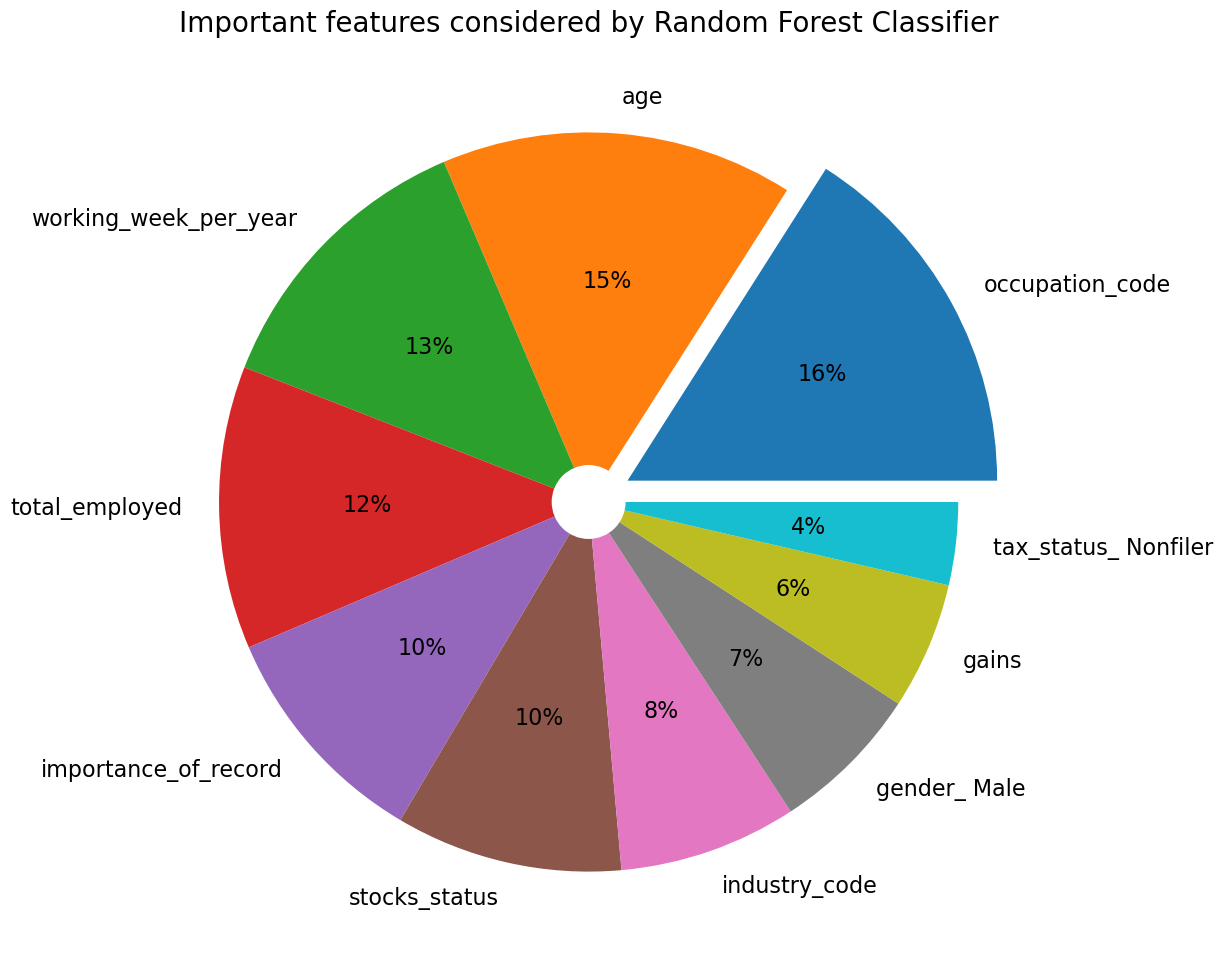

In [99]:
plt.figure(figsize=(12,12))
myexplode = [0.12,0,0,0,0,0,0,0,0,0]
plt.pie(feature_scores.nlargest(10),labels=feature_scores.nlargest(10).index, autopct='%.0f%%',explode= myexplode,
        textprops={'fontsize': 16})
centre_circle = plt.Circle((0,0),0.10,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Important features considered by Random Forest Classifier',fontsize=20)
plt.show()

In [100]:
## Top 10 features
feature_scores[0:9]

occupation_code          0.104355
age                      0.100731
working_week_per_year    0.082674
total_employed           0.080763
importance_of_record     0.065693
stocks_status            0.064806
industry_code            0.050863
gender_ Male             0.043175
gains                    0.036340
dtype: float64

In [ ]:
import joblib

In [ ]:
joblib.dump(ran_for, 'Random_Forest_Classifier.joblib')

In [ ]:
model_loaded = joblib.load('Random_Forest_Classifier.joblib')

In [ ]:
model_loaded.predict(X_test_encoded)

In [109]:
X_test_encoded['tax_status_ Nonfiler'].unique()     
 

array([0., 1.])

In [107]:
top10_attribute =list(feature_scores.nlargest(10).index)
top10_attribute

['occupation_code',
 'age',
 'working_week_per_year',
 'total_employed',
 'importance_of_record',
 'stocks_status',
 'industry_code',
 'gender_ Male',
 'gains',
 'tax_status_ Nonfiler']

In [116]:
X_test_new = X_test_encoded[top10_attribute]
X_train_new = X_train_encoded[top10_attribute] 

In [117]:
col_map={
    'tax_status_ Nonfiler': 'tax_status_Nonfiler'}
X_test_new.rename(columns=col_map, inplace=True)
X_train_new.rename(columns=col_map, inplace=True)

In [118]:
X_test_new.head(5)

occupation_code  age  working_week_per_year  total_employed  \
0               34   28                     52               2   
1               39   21                     45               6   
2               38   43                     52               6   
3               26   40                     52               3   
4                0    6                      0               0   

   importance_of_record  stocks_status  industry_code  gender_ Male  gains  \
0                905.79              0              4           1.0      0   
1               1299.69              0              4           1.0  27828   
2               3852.26              0             29           0.0      0   
3               1081.40              0             33           0.0      0   
4               3522.25              0              0           1.0      0   

   tax_status_Nonfiler  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  1.0

In [119]:
X_train_new.head(5)

occupation_code  age  working_week_per_year  total_employed  \
0               33   32                     52               1   
1                0   74                      0               0   
2               15   43                     52               6   
3               14   43                     52               6   
4                0   22                      0               0   

   importance_of_record  stocks_status  industry_code  gender_ Male  gains  \
0               1207.45              0             49           1.0      0   
1               2242.96              0              0           0.0      0   
2               3371.85              0             29           1.0      0   
3               1315.73            125             30           1.0      0   
4                691.33              0              0           0.0      0   

   tax_status_Nonfiler  
0                  0.0  
1                  1.0  
2                  0.0  
3                  0.0  
4                  1.0

In [120]:
#### fitting
ran_for.fit(X_train_new, Y_train)

RandomForestClassifier(random_state=42)

In [124]:
Y_pred_ran_for = ran_for.predict(X_test_new)

In [125]:
accuracy_score(Y_test, Y_pred_ran_for)

0.9844022340682689

##### Saving Model

In [126]:
import joblib

In [127]:
joblib.dump(ran_for, 'Random_Forest_Classifier.joblib')

['Random_Forest_Classifier.joblib']

In [128]:
model_loaded = joblib.load('Random_Forest_Classifier.joblib')

In [129]:
model_loaded.predict(X_test_new)

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)